# 주식분석

Last updated 202510

* 백테스트 backtesting.py
* 기계학습 백테스트

## 참고
- advances in financial machine learning
- see hello_finance.ipynb

# 6. 백테스트

백테스트는 과거 데이터에 대해 투자전략을 적용하고, 성과를 평가한다는 의미이다.

비록 과거에 대해 테스트하지만, 우수한 투자 전략을 선택하고 이를 바탕으로 미래를 내다본다는 필수적인 역할을 한다.

이것이 가능할까? 과거의 주가를 분석한다고 해서, 과연 미래를 헤아리는 것이 가능할까?

'과거는 미래를 말해준다'는 가설이 유효하다면 백테스트는 유용하다.

백테스트의 주요 절차는 다음과 같다.

- 투자 전략을 수학적 또는 논리적 규칙으로 설계한다.
- 과거 데이터를 수집하고, 필요한 형식으로 변환한다.
- 투자 전략을 적용하여 거래를 시뮬레이션한다.
- 수익률 등 투자 성과를 분석한다.


## 6.1 투자 전략

투자 전략이란 투자자가 시장에서 수익을 극대화하거나 손실을 최소화하기 위한 방법으로 보자.

백테스팅은 도구일뿐이고 투자 전략이 핵심이고, 어떻게 설계할지가 중요하다.

투자 전략은 다양한 방법이 활용할 수 있다.
- 기술적분석투자: 과거 주가와 거래량을 분석하는데, 주로 챠트분석, 패턴인식이나 이동 평균, RSI, MACD 등 지표를 활용한다. 전통적으로 주관적인 해석이 많았다. 수치화, 자동화하여 과학적 접근이 필요하다.
- 가치투자: PER, PBR 등 지표에 따라 내재 가치보다 저평가된 주식에 투자.
- 성장투자: EPS 성장률, 매출 성장률 등 높은 성장 잠재력을 가진 기업의 주식에 투자. 가치와 성장 투자는 종종 반대되는 접근으로, 절충이 필요하기도 하다.
- 배당투자: 안정적 배당금을 지급하는 기업의 주식에 투자
- 퀀트투자: 데이터를 기반으로 수학적 모델과 통계적 기법을 적용한 정량적 투자 방법으로 보통 자동화한다.
- 헤지 전략 (Hedge Strategy): 옵션, 선물, 공매도와 같이 포트폴리오의 위험을 최소화하기 위해 상반된 포지션을 동시에 취하는 전략, 헤지 전략은 독립적인 투자 전략이라기보다, 기존 포트폴리오의 리스크를 줄이는 보조적 성격이 강하다.

어떤 투자 전략이나 주가가 오를지 내릴지 예측할 수 있어야 하는데, 크게 두 접근 방식이 있다:
(1) 시계열 분석: 시계열 자체를 분석하면 여러 신호 장/단기 이평선 돌파, RSI, MACD, Stochastic Oscillator 같은 지표를 신호로 매매한다.
(2) 외생적 변수 분석: 시계열 밖 인과관계를 가지는 미시, 거시적 변수를 분석하거나 한다. 실적, 금리, 경제지표, 뉴스 등에 기반한 신호를 활용할 수 있다.

실제는 어떻게 할까? 단순 신호 매매보다 뿐 아니라, 포지션 규모(레버리지), 청산 조건(손절·익절), 리스크 관리(변동성·상관관계 고려)가 전략 성과에 더 큰 영향을 미친다.
- 단기 매매: 기술적 지표 중심 (MA, RSI, MACD)
- 장기/포트폴리오: 재무/거시경제 지표 결합

투자 전략이 매우 성공적이라고 하자. 그 알고리즘은 매우 높은 가치를 가지게 된다. 실로 많은 투자 기관이나 트레이더는 자신만의 전략을 비공개로 유지하며, 알고리즘이 외부로 유출되지 않도록 철저히 보호한다.

높은 수익률을 내는 전략이 알려지는 경우에도 사실 문제가 될 수 있다. 시장 참여자들이 모두 같은 전략을 사용하면, 시장에 미치는 영향으로 인해 전략의 효과가 감소할 수 있다.


## 6.2 라이브러리

백테스팅은 필수적이라고 볼 수 있는 만큼, 많은 라이브러리가 발표되어 왔다.

### 멀티종목, 실전형 Backtrader

독립적인 개발자에 의해 개발된 백테스팅 라이브러리로, 오픈 소스로 제공되며 커뮤니티에 의해 활발히 유지보수되고 있다.
전략을 클래스로 정의하고, 간단하게 백테스팅을 수행할 수 있고, Interactive Brokers(IB)나 Oanda와 같은 브로커를 통해 실시간 거래를 수행할 수 있다.

### 단일종목, 가볍고 빠른 backtesting.py

백테스팅을 간단하고, 가볍게 시작하려면 backtesting.py가 적합하다.

의존하는 외부 라이브러리가 상대적으로 적어, 설치와 사용이 간편하다.

backtesting.py는 기본적으로 Python 3.6 이상에서 작동하며, 최신 버전 3.7, 3.8, 3.9 등에서도 가능하다.

backtesting.py는 기본적으로 Bokeh를 사용하여 백테스팅 결과를 시각화한다 (반면에 Backtrader는 matplotlib을 사용한다)

### 윈도우에서 설치가 까다롭고, 개발이 멈춘듯 zipline

Zipline은 Quantopian에서 개발된 백테스팅 라이브러리로, 현재 오픈 소스로 공개되어 있고 더 이상 개발이 진행되지 않고 있는 것으로 보인다. 

주로 Quantopian 플랫폼에서 QuantConnect 등과 통합하여 사용 가능하다 (QantConnect: 클라우드 기반, 사용료 있다)

빠른 실행을 위해 데이터와 알고리즘이 벡터화되어 있어 큰 규모의 데이터를 효율적이다. 주로 백테스팅에 초점을 맞추고 있어, 실시간 트레이딩에는 적합하지 않다.
처음 설정할 때 다소 복잡할 수 있으며, 특히 Windows 환경에서의 설치가 까다로울 수 있고, 가능하다면 Linux나 macOS에서 사용을 권장한다.

zipline 설치 중에 "error: failed building wheel for h5py"라는 메시지는 h5py 라이브러리를 빌드(컴파일)하지 못했다는 뜻이다.
- h5py는 C 기반 라이브러리(HDF5)를 사용하는데, Python이 32비트 버전일 경우 빌드가 잘 안되거나 wheel(미리 컴파일된 패키지)이 제공되지 않아서 이런 문제가 발생한다. 
- 해결책은 64비트 Python 설치 + pip/setuptools/wheel 업그레이드(pip install --upgrade pip setuptools wheel)한다.

Quantopian의 종료 이후, 라이브러리 업데이트가 더디고, 최신 Python 버전과의 호환이 어려울 수 있으며 Python 3.6에서 잘 작동한다.

zipline-reloaded은 zipline을 이어받아 개발을 지속하고 있다. 그래도 import zipline으로 라이브러리를 사용한다.
python 3.7, 3.8, 3.9 64비트를 지원한다.

그 외:
- Quantiacs: Python과 MATLAB으로 전략을 코딩, 알고리즘 트레이딩 대회를 운영 
- Alphalens 알파 팩터 분석, Quantopian에서 사용하던 도구 중 하나이다.
- Quantlib: 금융 도구 및 파생상품 가격 계산 라이브러리로 백테스팅보다는 금융 공학, 옵션, 이자율 모델링 등에 중점을 둠.
- TradingView: 웹 기반 차트 및 기술적 분석 도구로, Pine Script를 사용하여 전략을 작성 가능.
- pycaret: 머신러닝 자동화 도구로 퀀트 전략 개발에 도움을 줌.
- bt (https://github.com/pmorissette/bt): 유연하고 강력한 포트폴리오 백테스팅 프레임워크
- PyAlgoTrade -> Basana (https://github.com/gbeced/basana): PyAlgoTrade는 개발이 멈추고 Basana가 뒤따르고 있다.
- VectorBT: 벡터화된 백테스팅 라이브러리, Pandas와 통합이 강점 (https://github.com/twopirllc/pandasta/blob/main/examples/VectorBT_Backtest_with_Pandas_TA.ipynb)


## 6.3 backtesting.py

여기서는 backtesting.py를 사용해서 백테스트를 수행해보자.

### 설치

먼저 backtesting.py를 배워보자. 설치하려면 pip install backtesting

### 주요 클래스 가운데 첫째 Strategy 클래스

백테스트를 하려면, 무엇보다 먼저 투자전략을 만들어야 한다 (Strategy 클래스를 통해 구현된다).

Strategy는 주가 시계열이 흘러가면서 어느 시점에 매수 또는 매도할지 관련하여 필요한 메소드와 속성을 가지고 있다.

#### 속성

주요 속성을 보자:
- data: Backtest()에 넘겨준 데이터가 여기에 전달된다.
    - (1) 윈도우 데이터 self.data
        - 원본에서 OHLCV 컬럼들만 특별 취급 (따라서 사용자가 추가한 데이터에 접근할 수 없다)
        - 슬라이딩 윈도우 방식으로 변환된 데이터 (numpy.ndarray). 윈도우 크기는 ```len(self.data) - 1```. next() 실행 시점까지의 데이터만 노출.
        - self.data.Close[-1] -> -1은 현재 종가
        - self.data.Close[-2] -> 직전 종가
    - (2) 원본 데이터프레임 self.data.df:
        - 원본 전체 데이터셋 (pandas.DataFrame), 사용자가 제공한 기본적 OHLCV와 함께 사용자가 추가한 모든 컬럼을 포함하고 있다.
        - self.data.df.Close.iloc[-1] -> 전체 데이터의 마지막 종가 (테스트가 완료되는 맨 마지막 끝 시점)
        - 추가된 데이터를 사용하려면 self.data.df를 사용해야 한다 (예: 계산된 지표나 추가 컬럼 등). self.data.RSI[-1] 같은 식은 안 되고 self.data.df["RSI"].iloc[-1] 처럼 접근한다.

    정리하면,
    - 첫 번째 루프: self.data는 df.iloc[:1]까지만 보임

    - 두 번째 루프: df.iloc[:2]

    - 세 번째 루프: df.iloc[:3]

    - … 이런 식으로 헤드부터 하나씩 늘어나면서 전략이 적용.

- position: 현재 포지션 상태를 나타낸다. (롱 포지션 또는 숏 포지션 여부 등)
예를 들어, self.position.is_long은 현재 롱 포지션(매수)인지 여부를 의미한다.

- trades: 현재 진행 중인 모든 트레이드의 목록이다.

- closed_trades: 이미 종료된 트레이드 목록이다.

- orders: 현재 활성화된 주문 목록이다.

- equity: 현재 투자금 전액 = 초기 투자금 + 포지션의 현재 가치로 계산된다.

#### 메소드

주요 메소드는 다음과 같다.
- init(): 초기화 작업을 수행한다.
필요한 데이터나 객체를 설정하고, 전략 시작 전에 한 번만 호출된다.
예를 들어, 기술적 지표 계산이나 필요한 데이터를 저장할 때 사용된다.

- I(): 전략에 추가할 지표를 생성한다.

- next(): 전략의 핵심 논리가 구현되는 메소드로, 데이터의 각 행(하루의 시가, 고가, 저가, 종가)에 대해 한 번씩 호출된다.
super().next()를 사용하면 부모 클래스의 next() 메소드를 호출할 수 있다.

- buy() & sell(): 매수 및 매도 주문을 생성하는 함수. 수량을 지정하지 않으면 1주 단위로 매매가 이루어진다. 매매 명령 후 자동으로 포지션이 갱신되고, 주문이 실행된다.

    - self.buy(): 현금 한도로 풀 매수가 기본 값. 포지션이 없을 때 이 명령을 실행하면, 사용자가 보유한 자금의 전체를 사용하여 매수한다.
    - self.sell(): 현재 보유분 풀 매도(청산)가 기본 값.


- close(): 사용자가 호출하며 자동으로 호출되지 않는다. 포지션 청산은 새로운 주문으로 취급되어, Order를 자동으로 생성한다. 
    - 롱 포지션이 있는 경우 -> sell 주문이 생성
    - 숏 포지션이 있는 경우 -> buy 주문이 생성
    - 주문이 체결되면 해당 포지션이 완전히 종료되고 self.position.size==0이 된다. 다시 중립 상태로 돌아가며, is_long와 is_short 모두 False가 된다. 이는 실제 거래에서 청산하는 주문과 동일하게 체결로 기록 된다 (trade execution).

#### 투자전략 클래스 템플릿

부모 전략을 상속받아 만드는데, 전략 클래스를 의미있는 코드는 없지만 다음과 같이 만든다.

```
class MyStrategy(bt.Strategy):
    params = (("ma1", 20), )
    def __init__(self):

    def log(self, txt):

    def notify_order(self, order):

    def notify_trade(self, trade):

    def next(self):

```

### 첫 시도: MA 투자전략

이동평균전략은 장단기 이동평균선의 교차점을 찾아 투자결정을 하는데, 이를 클래스로 만들어보자.

- 매수조건: 이동평균 상향돌파
- 매도조건: 이동평균 하향돌파


In [1]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

from backtesting.test import SMA, GOOG
import os

class SmaCross(Strategy):
    n1 = 30 #20
    n2 = 200 #50

    def init(self):
        close = self.data.Close #데이터프레임 df['Close'].values
        self.ma1 = self.I(SMA, close, self.n1) # n1기간의 이동평균을 계산
        self.ma2 = self.I(SMA, close, self.n2)

    def next(self):
        #print(f"{len(self.data)} 일자:{self.data.index[-1]} 보유: {self.position.size} \t보유자금: {self.equity:.1f}")
        if crossover(self.ma1, self.ma2):
            print(f"[+매수] 일자:{self.data.index[-1]} 직전보유: {self.position.size} 종가: {self.data.Close[-1]}" \
                    f"\t보유자금: {self.equity:.1f}")
            self.buy() # 기본값 1, 전량

        elif crossover(self.ma2, self.ma1):
            print(f"[-매도] 일자:{self.data.index[-1]} 직전보유: {self.position.size} 종가: {self.data.Close[-1]}")
            self.sell()

C:\Users\admin\Code\git\bb\jsl\pyds\env3.9\lib\site-packages\backtesting\_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

C:\Users\admin\Code\git\bb\jsl\pyds\env3.9\lib\site-packages\backtesting\test\__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),
C:\Users\admin\Code\git\bb\jsl\pyds\env3.9\lib\site-packages\backtesting\test\__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),


- 참고 Bokeh 경고 메시지: backtesting.py는 기본적으로 Bokeh 라이브러리를 이용해 차트를 그린다. 환경이 Jupyter Notebook인지 자동으로 감지하면, output_notebook() 모드로 설정해서, 노트북 셀 안에서 JavaScript 기반 차트를 표시하려고 한다는 의미이다.

- 코드 self.I(SMA, close, self.n1): SMA함수를 종가에 적용해서 n1기간의 이동평균을 지표화 (I() 함수)
- 코드 next() 함수의 인덱스 -1는 슬라이딩 윈도우의 현재 바를 의미한다 (슬라이딩 윈도우에서 -1이 현재 바로 해석되고, -2, -3은 직전, 그 이전의 바를 가리키게 된다). 매회 출력하면 다음과 같다.
```
    201 일자:2010-10-21 00:00:00 보유: 0 	보유자금: 1000000.0   # 인덱스는 이동평균 긴 것부터 시작한다는 의미
    202 일자:2010-10-22 00:00:00 보유: 0 	보유자금: 1000000.0
    203 일자:2010-10-25 00:00:00 보유: 0 	보유자금: 1000000.0
    ...생략...
``` 
    - 주의: backtesting.py에서는 self.data.Close[-1]이 현재, 그러나 곧 배우는 backtrader에서는 self.data.close[0]가 현재를 가리키므로 주의한다. backtrader에서는 배열처럼 생각하는 게 아니라 "현재 시점이 항상 기준"이라는 철학 때문에 0: 현재, -1: 한칸전, -2: 두칸전)

- 코드 self.data.df, self.data의 차이

    - self.data: Open, High, Low, Close, Volume과 같은 기본적인 OHLCV 데이터만 포함하고 있다 (numpy array)
    - self.data.df: 사용자가 제공한 기본적 OHLCV와 함께 사용자가 추가한 모든 컬럼을 포함하고 있다 (pandas DataFrame)


- 비슷하게 self.ma1이나 self.ma2는 내부적으로 np.ndarray 형태로 변환되어 시간 순서대로 관리된다. index가 없어도 순서가 보장됨

- 코드 print문의 self.equity는 현재 투자금 전액 (broker.cash는 제공되지 않는다), self.position.size는 보유하고 있는 주식의 수량 (order.size는 출력할 수 없다)
- 코드 cash=100000000: cash를 설정하지 않으면 Backtesting.py는 30,000 Backtrader는 100,000. cash의 기본 단위는 라이브러리에 의해 달러화(USD)로 고정된 것이 아니라, 사용자가 가정하는 통화에 맞추어 해석한다.
- 코드 exclusive_orders=True: 주문이 동시에 실행되지 않도록 하나의 주문이 완료된 후에야 다음 주문이 실행


### 시작점의 두번째 백테스트 클래스: 메인함수 run()으로 결과 산출, plot()으로 시각화

이 클래스는 데이터를 입력받고 그 위에 투자전략을 전략을 테스트 또는 시뮬레이션하는데, 메인함수에 해당하는 run()을 통해 실행된다.

주요 멤버변수는 다음과 같다.
- data: 백테스트에 사용되는 과거 데이터를 보통 Pandas DataFrame 또는 Numpy Array 형태로 저장한다. 일시 (인덱스), Open, High, Low, Close, Volume(선택적) 컬럼을 가진다. 다른 컬럼을 추가할 수 있다. DataFrame 형태의 가격 데이터 (OHLC 필수)
- strategy: 백테스트에 사용할 전략 클래스
- cash: 초기 자본을 설정, 예를 들어, 1백만 원으로 전략을 테스트하고 싶다면 이 값을 설정한다.
- commission: 거래마다 차감할 수수료 비율 (기본값: 0)
- trade_on_close: 당일 종가로 거래할지 여부
- hedging=False: 헤징전략을 사용할지 여부
- exclusive_orders=False  하나의 주문이 완료된 후에야 다음 주문이 실행할지 여부, 동시에 여러 주문이 발생하지 않도록 제어

주요 멤버함수는 다음과 같다.
- run(): 백테스트를 실행하는 시작 함수이다. 전략을 데이터에 적용하고, 결과를 산출한다.
- optimize() 전략의 파라미터를 최적화
- plot(): 백테스트 결과를 그래프나 차트 형태로 결과를 보여준다.

run()하기 위해서는 이렇게 Backtest(data, strategy, *, cash, commission, margin, trade_on_close=False, hedging=False, exclusive_orders=False)에 필요한 데이터를 넘겨야 한다. 그 데이터를 기반으로 다음 절차를 수행한다.
- 데이터 준비: 과거 데이터를 로드하고 (data 필드: pd.DataFrame의 과거 데이터), 백테스트에 사용할 수 있도록 준비한다. 또한 초기 투자금 (cash 변수), 거래 수수료 (commision 변수), 마진 (필요 시, margin 변수) 도 설정한다.
- 전략 실행: 준비된 데이터에 전략을 적용하여 (만들어 놓은 Strategy 클래스), 매수/매도 신호를 생성한다. 이 과정에서 포지션 관리, 리스크 관리 등의 규칙이 적용된다.
- 결과 저장: 백테스트가 끝나면, 성과 지표를 stats 속성에 저장.
- 결과 시각화: 필요에 따라 plot() 메서드를 사용하여 결과를 시각화할 수 있다. 이를 통해 매매 시점, 포트폴리오 가치 변화 등을 확인할 수 있다.

#### 백테스트에 던져줄 데이터

백테스트할 데이터를 가져오자. 이 데이터는 내가 작성한 투자전략이 어떤 성과를 내는지 테스트하게 된다.

In [2]:
import yfinance as yf

#sse2020_2024 = yf.download("005930.KS", start="2020-01-01", end="2024-07-20")
#df = sse2020_2024.copy() # 깊은 복사

import pandas as pd
import os
#ohlcv = pd.read_csv(os.path.join('data','my.csv'), index_col=0, parse_dates=True)
#sse2010_2024df=pd.read_csv(os.path.join('data','sse2010_2024.csv'), index_col=0, parse_dates=True)
sseTicker = yf.Ticker("005930.KS")
sse2010_2024 = sseTicker.history(start="2010-01-01", end="2024-12-31")
sse2010_2024df = sse2010_2024.copy() # 깊은 복사
sse2010_2024df.head

<bound method NDFrame.head of                                    Open          High           Low  \
Date                                                                  
2010-01-04 00:00:00+09:00  11889.526926  11978.365234  11845.107772   
2010-01-05 00:00:00+09:00  12230.070248  12274.489390  12067.200063   
2010-01-06 00:00:00+09:00  12274.494263  12452.170898  12230.075104   
2010-01-07 00:00:00+09:00  12452.166563  12452.166563  12037.587891   
2010-01-08 00:00:00+09:00  12141.233657  12156.040039  11933.944301   
...                                 ...           ...           ...   
2024-12-23 00:00:00+09:00  52403.666574  52992.471817  52305.532367   
2024-12-24 00:00:00+09:00  52698.072230  53483.145931  52599.938017   
2024-12-26 00:00:00+09:00  53483.145406  53581.279618  52501.803288   
2024-12-27 00:00:00+09:00  52859.791739  53452.611834  52563.381692   
2024-12-30 00:00:00+09:00  52662.186164  53353.809622  52464.579461   

                                  Close    Vol

#### 백테스트 run!

In [3]:
#bt = Backtest(GOOG, SmaCross, commission=.002, exclusive_orders=True)
bt = Backtest(sse2010_2024df, SmaCross, commission=.002, cash=1000000, exclusive_orders=True)
stats = bt.run() # stats: 백테스트 결과를 저장 (수익률, 최대 낙폭, 거래 횟수 등 다양한 성과 지표가 포함된다).
print(stats)

[+매수] 일자:2010-12-01 00:00:00+09:00 직전보유: 0 종가: 12217.982421875	보유자금: 1000000.0
[-매도] 일자:2011-06-24 00:00:00+09:00 직전보유: 80 종가: 12762.8154296875
[+매수] 일자:2011-11-01 00:00:00+09:00 직전보유: -81 종가: 14838.951171875	보유자금: 849794.7
[-매도] 일자:2013-06-27 00:00:00+09:00 직전보유: 59 종가: 20284.1484375
[+매수] 일자:2013-10-29 00:00:00+09:00 직전보유: -59 종가: 22571.603515625	보유자금: 1093604.7
[-매도] 일자:2014-01-09 00:00:00+09:00 직전보유: 48 종가: 19505.806640625
[+매수] 일자:2014-04-28 00:00:00+09:00 직전보유: -48 종가: 21234.55859375	보유자금: 867537.9
[-매도] 일자:2014-07-09 00:00:00+09:00 직전보유: 40 종가: 20018.21875
[+매수] 일자:2015-01-02 00:00:00+09:00 직전보유: -40 종가: 20652.791015625	보유자금: 788853.5
[-매도] 일자:2015-06-26 00:00:00+09:00 직전보유: 37 종가: 19845.3125
[+매수] 일자:2015-11-18 00:00:00+09:00 직전보유: -37 종가: 19907.474609375	보유자금: 737308.3
[-매도] 일자:2016-01-08 00:00:00+09:00 직전보유: 36 종가: 18490.11328125
[+매수] 일자:2016-03-23 00:00:00+09:00 직전보유: -36 종가: 20195.439453125	보유자금: 594871.3
[-매도] 일자:2018-02-19 00:00:00+09:00 직전보유: 29 종가: 39520.578125
[+매수] 일

- 코드 Backtest(sse2010_2024df...): Backtest 클래스는 첫 번째 인자로 DataFrame을 받아야 한다. 따라서 파일 경로를 직접 전달하는 대신, 파일을 읽어 DataFrame으로 전달해야 한다.

- 로그 설명:
    - 이동평균값에서 NaN이 없어지는 동안은 position이 없다
    - 이동평균전략이 적용되면서 position.size == 0으로 유지된다. 투자금(투자금+주식가치) 변화도 당연히 없다.
    - buy() 매수하면 position.size==매수량 (+ 양수값을 가진다. 롱이면 +). 종가기준으로 주문체결되고, 투자금도 계산된다.
    - sell() 매도하면 position.size==매도량 (- 음수값을 가진다. 숏이면 -). 종가기준으로 주문체결되고, 투자금도 계산된다.

- 출력 설명: 전략의 수익률 Return [%] 66.74% (15년 동안), 보유전략 Buy & Hold Return [%]  338.81%에 비해 매우 열등
    - 전략이 전체 시작 ~ 끝 기간 동안 시장에 노출된 시간을 백분율로 나타낸 값. 93.8%라는 값은 백테스트 기간 중 거의 대부분의 시간 동안 포지션을 유지했음을 의미한다.
    - Equity Final: 백테스팅이 끝난 시점에서 계좌의 총 자산, 죽 전략이 적용되어 최종적으로 얻게 된 금액을 의미한다.
    - Return [%] 백테스팅 기간 동안의 총 수익률, 초기 자본 대비 최종 자본의 증가율(%)로 계산된다.    
    - Buy & Hold Return [%]: 338.81% 
    동일한 기간 동안 단순히 자산을 매수 후 보유했을 때 얻을 수 있었던 수익률이다. 이 지표와 전략의 수익률을 비교하여 전략의 성과를 평가할 수 있다.
    - Return (Ann.) [%]: 연평균 3.54%
    연평균 수익률로, 전략이 연간으로 얼마나 수익을 올렸는지 보여준다.
    - Volatility (Ann.) [%]: 26.06% (변동성 큼)
    연간 변동성 지표이다. 전략의 수익률이 연간 얼마나 변동했는지를 보여주는 지표로, 리스크를 평가하는 데 사용된다.
    - Sharpe Ratio: 0.136 (매우 낮음) 초과수익률/분산으로 계산하고 분산(위험) 대비 초과수익률을 말하는 것으로, 일반적으로 >1 이상 기대한다 (2이상 우수).
    - Sortino Ratio: 0.204 (손실 리스크 대비 보상도 낮음) 초과수익률/하락분의 분산, Sharpe Ratio와 비슷하지만, 하락분에 대한 위험만 감안한다 (2이상 우수).
    - Calmar Ratio: 0.059 (드로다운 대비 성과가 형편없음) 연평균수익률(CAGR)/최대낙폭(드로우다운)으로 계산되고, 높을수록 좋다 (3이상이면 우)

    - 드로다운 (손실) 
        - **Max. Drawdown \[%]** → -59.36% (최대 반토막 이상 손실 경험)
        - **Avg. Drawdown \[%]** → -10.50%
        - **Max. Drawdown Duration** → 2919일 (약 8년간 회복 못 함)
- 왜 Buy & Hold보다 성과가 낮을까?
    - **장기 우상향 자산**이라서 단순히 들고 있었던 쪽이 훨씬 유리. SMA 크로스 같은 추세 추종 전략은 “중간 조정” 구간에서 오히려 손실을 반복.
    - 매매 횟수도 적고(26회) 승률도 30%밖에 안 되니, 좋은 장기 상승장에서 수익을 갉아먹음.
    - **드로다운 문제**: Buy & Hold보다 드로다운이 낮을 줄 기대하지만, 실제로는 -59%까지 당해서 리스크 관리에도 실패.

#### 그림으로 보면 쉽지, plot!

backtesting.py는 기본적으로 결과를 Bokeh를 사용하여 시각화한다. 

주의: Bokeh 버전 문제: python 3.9는 bokeh 2.4.3이나 3.2.1에서 잘 그려진다 (python 3.12, bokeh 3.5에서).
- 기본적으로 backtesting.py를 설치하면, backtesting 0.3.3과 Bokeh 최근 버전 (3.4.3)이 함께 설치된다. 호환성 문제가 발생할 수 있고, Bokeh 2.4.3이 안정적인 선택이다. 3.2.1도 잘 된다. 단 주피터 커널을 샷다운 하지 않으면 이전 버전을 로딩하므로 재설치 효과가 없다 (그냥 주피터 노트북을 닫고 다시 열면). 설치하면서 matplotlib의 버전을 재설치할 수 있으니 주의하자.
- 특정 버전을 설치하려면 pip install bokeh==2.4.3

In [4]:
bt.plot()

C:\Users\admin\Code\git\bb\jsl\pyds\env3.9\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\admin\Code\git\bb\jsl\pyds\env3.9\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\admin\Code\git\bb\jsl\pyds\env3.9\lib\site-packages\backtesting\_plotting.py:455: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2 = (df.assign(_width=1).set_index('datetime')


GridPlot(id='p1309', ...)

- 코드 bt.plot(): 기본으로 사용하는 Bokeh의 챠트를 그린다.

- 주의 BokehDeprecationWarning: Passing lists of formats for DatetimeTickFormatter scales was deprecated in Bokeh 3.0.

Bokeh의 버전 3.0에서 발생하는 경고로, 이전 버전에서는 DatetimeTickFormatter에서 여러 포맷을 리스트로 전달할 수 있었지만, Bokeh 3.0부터는 각 스케일에 대해 단일 문자열 포맷만 설정하도록 변경되었다. DatetimeTickFormatter 설정을 변경하면, 경고 없이 최신 Bokeh에서도 올바르게 동작한다.

```
from bokeh.plotting import figure
from bokeh.models import DatetimeTickFormatter

# 샘플 데이터 생성
dates = pd.date_range(start="2023-01-01", periods=100)
values = range(100)

p = figure(x_axis_type="datetime", width=800, height=350) # Bokeh figure 생성
p.xaxis.formatter = DatetimeTickFormatter(
    days="%Y-%m-%d",  # 단일 포맷 문자열로 설정
    months="%Y-%m",
    years="%Y",
)
```

해결: 이 경고가 backtesting.py 라이브러리의 내부 코드에서 발생하게 되는 경우, 사용자 측에서 수정하기 어렵다. 버전을 낮추면 해결될 수 있다 pip install bokeh==2.4.3

- 챠트를 보면 거래건수는 25건으로 색과 삼각형 방향이 구분되고 있다.
  - 녹색: 이익 트레이드
  - 빨간색: 손실 트레이드
  - 위쪽 방향 삼각형: 매수
  - 아래쪽 방향 삼각형: 매도

#### 이번에는 matplotlib plot

앞 결과를 저장한 stats를 활용하여 matplotlib 챠트를 작성해보자.

import matplotlib.pyplot as plt 한 후, plt로 챠트를 그린다.

In [5]:
stats

Start                     2010-01-04 00:00...
End                       2024-12-30 00:00...
Duration                   5474 days 00:00:00
Exposure Time [%]                   93.773687
Equity Final [$]               1667419.976758
Equity Peak [$]                1833381.009988
Return [%]                          66.741998
Buy & Hold Return [%]              338.819336
Return (Ann.) [%]                     3.54941
Volatility (Ann.) [%]               26.063206
Sharpe Ratio                         0.136185
Sortino Ratio                        0.204709
Calmar Ratio                         0.059794
Max. Drawdown [%]                  -59.360404
Avg. Drawdown [%]                  -10.501325
Max. Drawdown Duration     2919 days 00:00:00
Avg. Drawdown Duration      222 days 00:00:00
# Trades                                   26
Win Rate [%]                        30.769231
Best Trade [%]                      93.927478
Worst Trade [%]                    -14.820388
Avg. Trade [%]                    

matplotlib을 사용할 수도 있지만, 분석결과를 식별하여 챠트를 그려야 한다.
stats['_equity_curve']['Equity'] 결과를 활용하여 챠트를 작성해보자.

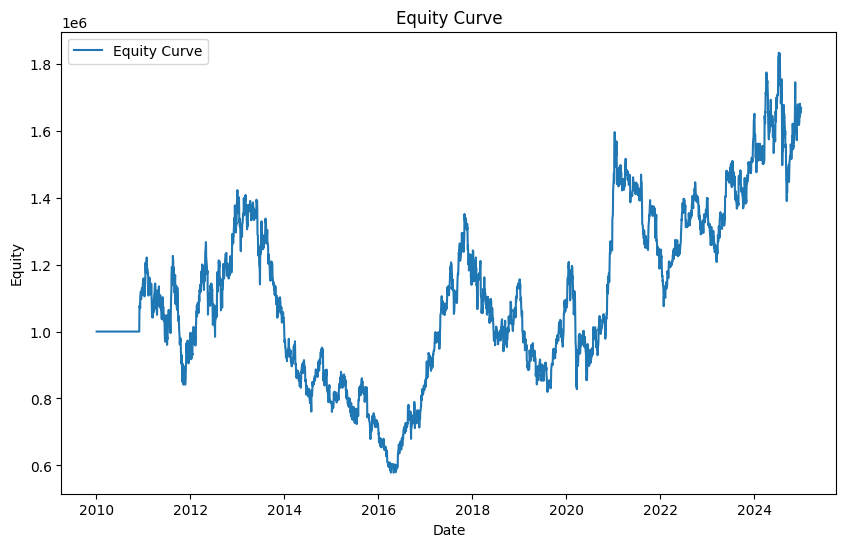

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(stats['_equity_curve'].index, stats['_equity_curve']['Equity'], label='Equity Curve')
plt.title('Equity Curve')
plt.xlabel('Date')
plt.ylabel('Equity')
plt.legend()
#plt.plot()

### 투자전략의 실행 자세히 - 객체중심으로

백테스팅 라이브러리에서의 투자 전략이 실행되면서, 어떤 객체가 생성되고 다음 어느 객체로 넘어가는 등의 흐름이 있다.

- (1) 신호 감지, 매수/매도 조건 판단
- (2) 포지션 상태 확인 ```if not self.position:```
- (3) 주문 발생: buy/sell 호출
- (4) 주문 체결: 가격을 정해 자동체결, 포지션 size 갱신, 잔고 조정
- (5) 거래 완료: 현금, 손익, 수수료 계산, next() 반복 순차적으로 진행된다.

백테스팅 라이브러리에서는 **주문/체결/포지션 관리/손익계산, 수수료 등** 대부분 자동 처리되고, 개발자는 전략 로직(신호 + 진입/청산 조건)만 작성하면 된다.

| 단계     | 백테스트 라이브러리 역할             | 개발자 역할             |
| ------ | ------------------------- | ------------------ |
| 신호 생성  | -                        | 지표 계산, 조건 작성       |
| 주문 발생  | 자동     | 호출 (`buy()`, `sell()`)                 |
| 체결     | 자동                   | 필요시 매수/매도 가격 지정 가능 |
| 포지션 관리 | 자동 (`position.size` 업데이트) | 전략에서 포지션 여부 확인     |
| 거래 완료  | 손익, 현금, 수수료 반영            | -                 |

<<1단계>>: 신호 감지

- 주식 가격이나 지표를 바탕으로 매수 또는 매도 신호를 탐지

```
if 매수신호의 발생:
    self.buy()
elif 매도신호의 발생:
    self.sell()
```

<<2단계>>: 포지션이 없는지 확인 (if not self.position:)하고 그에 따라 매수/매도

단일 포지션 전략(포지션이 없을 때만 진입, 포지션이 있을 때는 청산/전환만)으로 전제하고 절차를 살펴보자 (멀티 포지션 전략: 추가 매수, 추가 매도 허용).

```
if not self.position:  # 포지션 없음 (size == 0) -> 보유자산이 없고 현금상태 -> 새 주문 가능
    if 매수신호:
        self.buy(size=10)  # [10주 매수] -> 롱 포지션 진입
    elif 매도신호:
        self.sell(size=10) # [10주 공매도] -> 숏 포지션 진입 (size < 0)

else:  # 포지션 있음 (size != 0)
    if self.position.size > 0:  # 롱 포지션 보유 (양수는 롱, 음수는 숏, 0은 포지션 없슴)
        if 부분청산신호:
            self.sell(size=min(5, self.position.size))  # 롱 포지션 일부(최대 5주) 매도 청산
        elif 완전청산신호:
            self.close()  # 전체 포지션 청산
    elif self.position.size < 0:  # 숏 포지션 보유
        if 부분청산신호:
            self.buy(size=min(5, abs(self.position.size)))  # 숏 포지션 일부(최대 5주) 매수 청산
        elif 완전청산신호:
            self.close()  # 전체 포지션 청산

```


<<3단계>>: 주문 발생

- self.buy() / self.sell() / self.close() 로 주문을 요청한다. 이 시점에서는 아직 주문 체결 전 상태이다.

- 주문이 체결되면 notify_order() 메소드가 자동으로 호출되어 주문 상태를 추적한다.

- 아래같이 주문하면 Order 객체 생성, 주문상태를 추적하려면 주문객체를 저장해 두어야 한다.

```
self.order = self.buy()  # 매수 주문을 내고, 그 주문 객체를 self.order 변수에 저장(선택적)해서 나중에 상태를 확인할 수 있다
```

<<4단계>>: 주문 체결, 포지션 객체 업데이트 (체결 결과 반영)

주문이 실제 체결되면, 포지션 자동 갱신, Trade 객체 생성하고, 매수 가격, 매수한 자산의 양, 매도 후 얻은 수익 등의 정보를 기록한다.

자동 청산 없음 → 새로운 주문은 기존 포지션에 누적됨


- (1) 주문
    * `self.buy(size=10)` / `self.sell(size=10)` 은 단순히 주문 요청(order) 이다.
    * 즉시 체결될 수도 있고, 시장가·지정가 등 조건에 따라 체결이 안 될 수도 있다.

- (2) 체결(Fill)
    * 주문이 실제로 체결되면 **Trade 객체**가 생성되고, 체결된 수량, 체결 가격, 수수료, 손익 정보 등이 기록된다. ```trade = self.trades # 현재 트레이드 목록```
    * 이때 `self.position` 객체도 자동으로 갱신된다.

- (3) 포지션(Position) 객체 업데이트

    * self.position.size 값은 순 보유량을 나타낸다:

        * 양수 → 롱 (매수 포지션)
        * 음수 → 숏 (매도 포지션) (공매도 상태, 백테스트에서도 공매도가 가능하다)
        * 0 → 포지션 없음 (청산 상태)

    - self.position.size 갱신 규칙

        * **롱 포지션 상태 (`size > 0`)**

            * 일부 매도: `position.size` 감소
            * 전량 매도: `position.size == 0` → 포지션 종료
            * 보유 수량보다 초과 매도: `position.size` 음수 → 숏 포지션 전환

        * **숏 포지션 상태 (`size < 0`)**

            * 일부 매수: `position.size` 증가 (절댓값 감소)
            * 전량 매수: `position.size == 0` → 포지션 종료
            * 보유 수량보다 초과 매수: `position.size` 양수 → 롱 포지션 전환

    - self.position.size 업데이트 예시

        * 포지션 없음 (`size = 0`) 상태에서:    
            * `buy(10)` → `size = 10` (롱) (self.position.is_long=True, self.position.is_short=False "롱(long)" 포지션으로 설정)
            * `sell(10)` → `size = -10` (숏, 즉 공매도 진입)
            
        * 롱 10개 보유 (`size = 10`) 상태에서, 매도:       
            * `sell(5)` → `size = 5` (롱 일부 청산)
            * `sell(10)` → `size = 0` (롱 완전 청산)
            * `sell(15)` → `size = -5` (롱 청산 + 숏 전환)
        
        * 숏 10개 보유 (`size = -10`) 상태에서, 매수:    
            * `buy(5)` → `size = -5` (숏 일부 청산)
            * `buy(10)` → `size = 0` (숏 완전 청산)
            * `buy(15)` → `size = 5` (숏 청산 + 롱 전환)

    - 공매도(Short): 주식을 빌려서 매도해서 포지션을 시작하고(그래서 순자산이 음수 가능), 이를 매수로 청산하는 방식이다.
        * **매수 → 롱 포지션 진입** → 나중에 매도해서 청산 (롱포지션 청산이라고 하며, 공매도라고 하지는 않는다.).
        * **매도 → 숏 포지션 진입** (보유 주식이 없어도 가능) → 나중에 매수해서 청산 (숏 청산).
        * 포지션이 없는데도 불구하고 매도하면 -> 공매도이다.


<<5단계>>: 거래 완료

체결 후 손익 결과는 엔진이 자동으로 처리하므로, 전략 로직에서는 따로 계산할 필요가 없다.


체결 후 엔진이 자동으로:

- 현금 잔고(cash) 증감

- 수수료 반영

- 평가 손익(PnL) 업데이트


사용자는 필요할 때:

- self.broker.getvalue() → 총자산

- self.broker.getcash() → 현금잔고

- self.position → 포지션 상태를 참고할 수 있다.


이후 다음 bar에서 next()가 다시 실행되며 절차가 반복된다.

### Position 클래스: next함수에서 갱신

Position 클래스는 현재 보유 수량(size), 평균 진입 가격(price) 등을 제공하며, 앞서 Strategy 클래스에서 설명한 self.position에 저장되어 포지션 상태를 읽는 용도로만 사용된다고 이해하자.

주식 포지션은 크게 두 가지로 나눌 수 있다. 어떤 포지션을 택할 것인지, 쉽게 생각하면 상승을 예상하면 롱 포지션으로, 반대로 하락을 예상하면 쇼트 포지션으로 가면 된다.

- Long position 투자자가 주식을 매수하고 이를 보유하는 상태를 의미.
- Short position 투자자가 주식을 빌려서 매도한 상태를 의미한다. 나중에 주가가 하락하면 더 낮은 가격으로 다시 사들여 이익을 얻는 전략.

주요 속성과 메서드
- size: 현재 보유하고 있는 포지션의 수량. 가치(self.position.size * self.dataclose[0])를 계산할 수 있다.
    - self.position.size == 0 또는 if not self.position 현재 보유하고 있는 포지션이 없다, 즉 0이다.
    - self.position.size: 보유하고 있는 주식의 수량을 의미한다.
- price: 포지션을 열었을 때의 평균 진입 가격이고, 수익률 계산에 사용된다.
- pl: 현재 포지션의 실현되지 않은 손익, 즉 포지션을 청산하지 않은 상태에서의 이익 또는 손실이다.
- is_long: 현재 포지션이 롱 포지션인 경우 True를 반환한다.
- is_short: 현재 포지션이 숏 포지션인 경우 True를 반환한다.
- pl_pct: 포지션의 퍼센트 수익률
- close(): backtesting.py에서는 close()함수를 제공하지만, 읽는 용도로 주로 사용되니까 명시적 호출은 필요한 경우에만 하자. backtrader에서는 buy(), sell(), close()와 같은 주문 함수에 따라 포지션이 갱신된다.

### Order 클래스: notify_order 함수에서 관리

Strategy.sell() 매수, Strategy.buy() 매도하면 Order가 자동으로 생성되고 (notify_trade() 함수 호출), 주문이 체결되기 전까지는 대기 상태이다. 주문이 체결되면 Order가 Trade로 전환되며, 포지션이 생성되거나 변경된다.

주요 속성과 메서드
- status: 주문의 현재 상태로 다음과 같이 구분된다.
    - Created: 주문이 생성되었으나 아직 제출되지 않은 상태.
    - Submitted: 주문이 거래소에 제출된 상태.
    - Accepted: 주문이 거래소에서 수락된 상태.
    - Completed: 주문이 완전히 체결된 상태.
    - Canceled: 주문이 취소된 상태.
    - Expired: 주문이 만료된 상태.

- is_long: 주문의 크기(size)가 양수이면 True, 매수 주문임을 의미한다.
- is_short: 주문의 크기(size)가 음수이면 True, 매도 주문임을 의미한다.
- size: 주문의 수량이고, 두 가지 경우로 구분된다:
    - 0 ~ 1 사이: 투자비율을 의미, 예를 들면 0.8은 80% 투자를 뜻한다.
    - 1: size를 설정하지 않는 경우의 기본 값, 최대 개수 100% 투자를 의미
    - 1 이상: 1이상인 경우 주문개수를 의미한다.
- price: 주문이 생성된 가격
- isbuy(), issell() 매수 주문인지, 매도 주문인지 확인
- sl (Stop-Loss 가격): 손실을 제한하기 위해 설정하는 가격이다. 이 가격에 도달하면 자동으로 매도 또는 매수 주문이 실행된다. 예를 들어, A 주식을 100달러에 매수한 후 스탑 로스 가격을 90달러로 설정하면, 주가가 90달러로 떨어졌을 때 자동으로 매도 주문이 실행되어 손실을 최소화할 수 있다.

Order 객체의 흐름
- 주문 생성: Strategy.buy() 또는 Strategy.sell() 메서드를 호출하여 주문이 자동 생성된다. 이때 Order 객체가 만들어진다.

- 주문 대기: 생성된 주문은 초기 상태로 대기하며, 거래소에서 수락될 때까지 Submitted 또는 Accepted 상태에 있다.

- 주문 체결: 주문이 거래소에서 체결되면 Completed 상태가 되며, 이 시점에서 포지션이 생성되거나 변경된다. 체결된 주문은 자동으로 Trade 객체로 전환되어 기록된다.

- 주문 취소/만료: 주문이 취소되거나, 유효 기간이 지나 만료되면 Canceled 또는 Expired 상태가 된다. 이 경우, 주문은 체결되지 않았으므로 포지션에 영향을 미치지 않는다.

### Trade 클래스: notify_trade 함수에서 관리

Order가 체결되면, 그 결과로 Trade 객체가 생성된다 (notify_trade() 함수 호출)
Trade는 실제로 체결된 거래이고, 포지션에 변화가 발생할 때 기록된다.
예를 들어, 매수 주문이 체결되면 포지션이 증가하고, 이때 Trade 객체가 생성된다.
Trade는 매수와 매도의 체결된 결과로, 손익 계산 및 거래 내역에 기록된다.

주요 속성과 메서드
- size: 거래된 자산의 수량, 예를 들어, 100주를 매수하거나 매도했다면 size는 100이 된다 (0~1은 투자비율)
- price: 거래가 체결된 가격
- value: 거래의 총 가치, 예를 들어, 100주를 주당 5000원에 매수했다면 value는 500,000원이다.
- commission: 거래 시 발생한 수수료, 브로커에게 지불하는 비용이다.
- pnl (Profit and Loss): 거래로 인해 발생한 손익, 거래가 종료된 후에만 계산되며, 수수료를 포함한 순수익을 보여준다.
- is_long: True이면 롱 포지션(매수 후 보유)을 나타내며, False이면 숏 포지션(매도 후 보유)을 의미한다.
- isclosed, isopen: 거래가 종료되었는지 여부(True/False), 거래 open -> 포지션 size 증가, 거래 close -> 포지션 0
- duration: 포지션이 유지된 기간, 포지션이 열린 후부터 청산될 때까지의 시간을 측정한다.

Trade 객체의 흐름
- 주문 체결: Order가 체결되면, 그 결과로 Trade 객체가 생성된다. 이 객체는 새로운 포지션을 열거나 기존 포지션을 확장한다.
- 포지션 관리: Trade 객체는 포지션의 상태를 추적한다. 롱 포지션인지 숏 포지션인지, 얼마나 많은 자산이 거래되었는지, 포지션이 열린 기간은 얼마나 되는지를 관리한다.
- 거래 종료: 포지션이 청산되면 Trade 객체는 손익(pnl)을 계산하고, 거래의 총 결과를 기록한다. 이 시점에서 is_closed 속성은 True로 변경된다.
- 성과 평가: 여러 Trade 객체가 생성되고 종료됨에 따라 개별 거래의 결과를 집계해서 전체 전략의 성과를 평가한다.

### backtesting.py과 backtrader 간 Position, Order, Trade의 차이

Position, Order, Trade를 어떻게 통제하는지 서로 차이가 있다.

- Position
    - backtrader는 self.position을 통해 통제한다.
    - 반면 backtesting.py는 온전한 클래스가 있어 이를 통해 통제한다.
    - 따라서 close()가 차이가 있다.
        - Backtrader에서는 Strategy 클래스의 self.close(), 현재 포지션을 종료하기 위한 매도 또는 매수 주문을 생성한다. 직접 포지션 객체에서 close()를 호출하는 방식은 지원되지 않는다. Backtrader의 Position 객체는 상태만 나타낸다 (현재 포지션이 있는지, 몇 주를 보유 중인지 등), 주문(Order)이 포지션을 변경하는 유일한 수단이다. 즉, 포지션을 직접 조작하는 대신 주문(buy(), sell(), close())을 통해 관리한다.
            - (backtrader는 self.close() -> 주문생성 -> 주문체결 -> 포지션 종료)
        - 반면 Backtesting.py에서는 포지션의 self.position.close() 함수를 통해 포지션을 직접 종료할 수 있다. self.close() 메서드는 존재하지 않거나 오류를 발생시킨다.

- Order, Trade:
    - Backtrader는 notify_order, notify_trade 함수를 통해서 보다 세밀한 통제가 가능하다. order.size, borker.cash, broker.equity 등 직접 설정이 가능하다. size>1은 개수이지만, 0~1은 투자비율로 해석되며 addsizer를 통해 설정한다.
    - 반면 backtesting.py는 객체지향 원칙에 따라 은익해서 개발자가 호출할 필요 없어 복잡성을 덜었다. 대신 Position 클래스를 통해 Order나 Trade를 개발자 노력없이 자동으로 관리하고 있다 (order.size, broker.cash 등을 직접 사용할 수 없다. broker.equity 대신 그냥 self.equity라고 해야 한다). size는 0~1 투자비율, 1이상은 개수를 의미한다 (비율일 경우 addsizer 같은 설정이 필요 없고, 직접 비율을 적어주면 된다)
    - 특히, size=1의 의미가 서로 다르다.
        - backtesting.py size=1: 자산의 100%를 투자, 잔고의 전부를 사용한다. 0 ~ 1은 비율만큼 투자하게 된다.
        - backtrader size=1: 1개의 주식을 의미한다. 전량 매매를 원하면 현재 잔고를 고려하여 size를 직접 계산해서 지정해야 한다.


### 투자전략 최적화 optimize

I() 함수에 Pandas에서 생성한 이동평균 지표를 사용해보자.

지표를 조합하여 어떤 성과를 산출하는지 분석하려면, 상당한 반복이 필요하다.
다행히도 최적화 함수가 제공되고 있다.

In [11]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
import pandas_ta as ta
 
class SmaCross(Strategy):
    n1 = 30 #20
    n2 = 200 #50
    def init(self):
        # numpy.array 대신 pandas.Series를 반환하기 때문에 --> 오류
        #self.sma10 = self.I(ta.sma, self.data.Close, self.n1)
        #self.sma20 = self.I(ta.sma, self.data.Close, self.n2)
        # pandas_ta에서 계산한 이동평균을 numpy 배열로 변환 --> 오류
        #self.sma10 = self.I(lambda x: ta.sma(x, self.n1).to_numpy(), self.data.Close)
        #self.sma20 = self.I(lambda x: ta.sma(x, self.n2).to_numpy(), self.data.Close)
        # 이동 평균 계산을 직접 수행하여 numpy 배열로 변환
        self.sma10 = self.I(lambda x: pd.Series(x).rolling(self.n1).mean().to_numpy(), self.data.Close)
        self.sma20 = self.I(lambda x: pd.Series(x).rolling(self.n2).mean().to_numpy(), self.data.Close)

    def next(self):
        #if crossover(self.data.sma10, self.data.sma20):
        if crossover(self.sma10, self.sma20):
            self.buy()
        #elif crossover(self.data.sma20, self.data.sma10):
        elif crossover(self.sma20, self.sma10):
            self.sell()

#cash는 정수 소수 모두 가능하고 컴마없이 적는다. commission은 퍼센트를 적지 않는다. .015는 1.5% 
bt = Backtest(sse2010_2024df, SmaCross, cash=1000000, commission=.015, exclusive_orders=True)
 
#output = bt.run()
output = bt.optimize(n1=range(5,60,5),
                     n2=range(50,200,5),
                     maximize='Return [%]', 
                     #maximize='Equity Final [$]',
                     constraint=lambda param: param.n1 < param.n2)
print(output)
bt.plot(filename=f'scripts/tearsheet.html', plot_drawdown=True, open_browser=False)


C:\Users\admin\Code\git\bb\jsl\pyds\env3.9\lib\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 327 configurations.
  output = _optimize_grid()


  0%|          | 0/9 [00:00<?, ?it/s]

Start                     2010-01-04 00:00...
End                       2024-12-30 00:00...
Duration                   5474 days 00:00:00
Exposure Time [%]                   97.022198
Equity Final [$]               2155328.534821
Equity Peak [$]                2243965.658998
Return [%]                         115.532853
Buy & Hold Return [%]              338.819336
Return (Ann.) [%]                    5.378465
Volatility (Ann.) [%]               27.078784
Sharpe Ratio                         0.198623
Sortino Ratio                        0.302584
Calmar Ratio                         0.106731
Max. Drawdown [%]                  -50.392668
Avg. Drawdown [%]                   -8.870322
Max. Drawdown Duration     1434 days 00:00:00
Avg. Drawdown Duration      123 days 00:00:00
# Trades                                   35
Win Rate [%]                        42.857143
Best Trade [%]                     100.833108
Worst Trade [%]                    -14.300677
Avg. Trade [%]                    

C:\Users\admin\Code\git\bb\jsl\pyds\env3.9\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\admin\Code\git\bb\jsl\pyds\env3.9\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\admin\Code\git\bb\jsl\pyds\env3.9\lib\site-packages\backtesting\_plotting.py:455: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2 = (df.assign(_width=1).set_index('datetime')


GridPlot(id='p1690', ...)

In [12]:
print("최적화된 매개변수 조합:", output._strategy)

최적화된 매개변수 조합: SmaCross(n1=35,n2=85)


### RSI 투자전략

지금까지 MA 전략을 설명했다. 이번에는 RSI 투자전략으로 시도해보자.

- 매수조건: RSI가 적정구간 이하 (과매도)
- 매도조건: RSI가 적정구간 이상 (과매수)

In [ ]:
import datetime
import pandas_ta as ta
import pandas as pd

from backtesting import Backtest
from backtesting import Strategy
from backtesting.lib import crossover

class RsiOscillator(Strategy):

    upper_bound = 70 # 70이상이면 과매수
    lower_bound = 30 # 30이하이면 과매도
    rsi_window = 14 # 이전 14개 데이터항목을 기준으로 계산한다.

    def init(self):
        self.rsi = self.I(ta.rsi, pd.Series(self.data.Close), self.rsi_window)

    def next(self):
        if crossover(self.rsi, self.upper_bound):
            self.position.close() #self.close() -> Error
        elif crossover(self.lower_bound, self.rsi):
            self.buy()

bt = Backtest(sse2010_2024df, RsiOscillator, cash=1000000, commission=.002)
stats = bt.run()
statsOpt = bt.optimize(
        upper_bound = range(50,85,5),
        lower_bound = range(15,45,5),
        rsi_window = range(10,30,2),
        maximize='Equity Final [$]')
bt.plot()

대단한 성과를 보이고 있다. 수익률이 805%, 최종 9배 정도의 투자금이 되고 있다.

In [ ]:
statsOpt

In [ ]:
print("최적화된 매개변수 조합:", statsOpt._strategy)

- 코드 self.position.close(): 현재 포지션이 존재할 경우 해당 포지션을 직접 종료 (backtrader는 self.close() -> 주문생성 -> 주문체결 -> 포지션 종료). 현재의 포지션이 매수(Long) 상태라면, self.sell()과 같은 의미이다 (완전매도의 경우 그렇다. position.close 청산이 안되면 수익률 계산에 영향을 미친다.)
    - self.sell(): 매도 주문이 실행되면 기존의 매수 포지션이 종료되지만, 새로운 매도 포지션이 생성된다는 차이가 있다.

### 복합조건: MA, RSI (일간, 주간), sl, tp

MA, RSI의 복수지표를 활용해서 투자전략을 설계해보자.

매수 조건:
- 포지션이 없고 (not self.position)
- 일간 RSI(self.daily_rsi), 주간 RSI(self.weekly_rsi)의 적정범위 비교
- 단기 이동평균선(ma10)이 장기 이동평균선(ma20, ma50, ma100)보다 큰지 비교

청산 조건:
- 손절매, 이익실현 기준이면 포지션을 청산 (self.position.close() -> position.size==0) (buy() 함수에도 설정할 수 있다)

손절매하면 추세를 추적하지 않고 중단하는 것을 말한다 (Trailing Stop). 기준은 종가에서 얼마나 하락했는지 비율에 따라 설정하는데, 여기서는 8%로 설정한다. 가격 변동에 민감하게 반응하기 때문에 손절매가 잦아지고 수익이 제한될 수 있다.
- 100,000원에 매수하고 5%의 sl을 설정하면, 95,000원(100,000원의 95%) 이하로 떨어지면 자동으로 매도 주문이 실행된다.
- 주가가 110,000원으로 상승하면, 104,500원(110,000원의 95%)으로 조정된다.
- 계속 주가가 120,000원으로 상승할 경우, 114,000원으로 상향한다. 이 가격 이하로 떨어지면, 트레일링 스톱이 발동되어 자동으로 매도 주문이 실행되고 그 시점에 이익이 확정된다. 

sl, tp 로그를 출력하려면 notify_order()에서 추문을 추적해서 출력해야 한다.

> 더 알아보기: 손절매 stop loss vs 추적손절매 trailing stop

| 구분             | Stop Loss                         | Trailing Stop                                      |
| -------------- | --------------------------------- | -------------------------------------------------- |
| **기준 가격**      | 고정된 손절 가격                         | 시장 가격에 따라 **자동으로 이동('추적')**                        |
| **목적**         | 손실 최소화                            | 손실 제한 + **이익 보호**                                  |
| **예시**         | 매수가 100원, 손절가 90원 → 가격이 90원 되면 매도 | 매수가 100원, 트레일링 폭 10% → 가격이 120원이면 스탑은 108원으로 자동 조정 |
| **가격이 되돌아올 때** | 스탑가가 변하지 않음                       | 상승 시 스탑가 상승, 하락 시 스탑가 고정                           |


resample_apply 함수가 시간 기반으로 리샘플링하려면 반드시 DatetimeIndex가 필요하니, 확인하자.

없으면 Date컬럼을 인덱스로 만들어주어야 한다.
```
sse2010_2024df['Date'] = pd.to_datetime(sse2010_2024df['Date'])
#sse2010_2024df.set_index('Date', inplace=True)
```

In [ ]:
sse2010_2024df.index

In [8]:
import pandas as pd
import pandas_ta as ta
from backtesting import Strategy, Backtest
from backtesting.lib import resample_apply

def SMA(array, n):
    return pd.Series(array).rolling(n).mean()

#ta.rsi 대신 앞서 배운 이 함수를 사용해도 된다(매개변수가 Close로 변경)
def calculate_rsi(close, winSize=14):
    """close: numpy array or pandas Series"""
    delta = pd.Series(close).diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    gainMean = gain.rolling(window=winSize, min_periods=1).mean()
    lossMean = loss.rolling(window=winSize, min_periods=1).mean()

    rs = gainMean / lossMean
    rsi = 100 - (100 / (1 + rs))
    return rsi

class RsiSma(Strategy):
    d_rsi_win = 14  # 일간 RSI 윈도우
    w_rsi_win = 14  # 주간 RSI 윈도우
    rsi_high=70
    rsi_low=30
    #level = 70  # RSI 레벨
    sl = 0.8  # 손절매 비율
    tp = 1.5  # 이익실현 비율

    def init(self):
        self.ma10 = self.I(SMA, self.data.Close, 10)
        #self.ma20 = self.I(SMA, self.data.Close, 20)
        self.ma50 = self.I(SMA, self.data.Close, 50)
        self.ma100 = self.I(SMA, self.data.Close, 100)
        self.daily_rsi = self.I(calculate_rsi, self.data.Close, self.d_rsi_win) # ok
        #self.daily_rsi = self.I(ta.rsi, self.data.Close, self.d_rsi_win) # ok
        #self.daily_rsi = self.I(ta.rsi, pd.Series(self.data.Close), self.d_rsi_win) #pd.Series는 일자 포함
        #self.weekly_rsi = resample_apply('W-FRI', self.daily_rsi, self.data.Close, self.w_rsi_win) # ERROR
        #self.weekly_rsi = resample_apply('W-FRI', ta.rsi, pd.Series(self.data.Close), self.w_rsi_win) # ERROR date 인식 못함
        self.weekly_rsi = resample_apply('W-FRI', ta.rsi, self.data.Close, self.w_rsi_win)

    def next(self):
        _close = self.data.Close[-1]
        #print(f"[{len(self.data)}] {self.data.index[-1]} RSId: {self.daily_rsi[-1]:.1f}"
        #      f" RSIw: {self.weekly_rsi[-1]:.1f} MA10: {self.ma10[-1]} MA50: {self.ma50[-1]}")
 
        if not self.position:
            if self.weekly_rsi > self.rsi_low and self.ma10[-1] > self.ma50[-1]:
                print(f"[+매수] 일자:{self.data.index[-1]} 직전보유: {self.position.size} 가격: {_close} 보유자금: {self.equity:.1f}")
                self.buy(sl=self.sl * _close, tp=self.tp * _close)
                #self.buy() #sl,tp 없이 매수
        else:
            if self.daily_rsi > self.rsi_high or self.ma10[-1] < self.ma50[-1]:
                print(f"[-청산] 일자:{self.data.index[-1]} 직전보유: {self.position.size} 가격: {_close} 보유자금: {self.equity:.1f}")
                self.position.close()

    def _next(self):
        _close = self.data.Close[-1]

        if (not self.position and
            self.daily_rsi[-1] > self.rsi_low and
            self.weekly_rsi[-1] > self.rsi_low and
            #self.weekly_rsi[-1] > self.daily_rsi[-1] and
            #self.ma10[-1] > self.ma20[-1] > self.ma50[-1] > self.ma100[-1] and
            self.ma10[-1] > self.ma50[-1] and
            _close > self.ma10[-1]):
            print(f"[+매수] 일자:{self.data.index[-1]} 직전보유: {self.position.size} 가격: {_close} 보유자금: {self.equity:.1f}")
            self.buy() # sl,tp를 넣으면 elif의 청산조건과 중복될 수 있다.
        # 가격이 이동평균10 손절매 기준 미만이면 청산
        #elif _close < self.sl*self.ma50[-1]: # buy(청산)과 청산로직이 중복되면 주의
        elif self.position and _close < self.sl * self.ma50[-1]:
            print(f"[-청산] 일자:{self.data.index[-1]} 직전보유: {self.position.size} 가격: {_close} 보유자금: {self.equity:.1f}")
            self.position.close()

backtest = Backtest(sse2010_2024df, RsiSma, cash=1000000, commission=.002)
stats= backtest.run()
print(stats)

[+매수] 일자:2010-06-23 00:00:00+09:00 직전보유: 0 가격: 11919.13671875 보유자금: 1000000.0
[-청산] 일자:2010-07-05 00:00:00+09:00 직전보유: 83 가격: 11428.2822265625 보유자금: 953586.2
[+매수] 일자:2010-07-15 00:00:00+09:00 직전보유: 0 가격: 12217.982421875 보유자금: 947402.6
[-청산] 일자:2010-07-27 00:00:00+09:00 직전보유: 77 가격: 12352.083984375 보유자금: 960445.4
[+매수] 일자:2010-07-28 00:00:00+09:00 직전보유: 0 가격: 12471.2802734375 보유자금: 963887.0
[-청산] 일자:2010-08-13 00:00:00+09:00 직전보유: 76 가격: 11636.884765625 보유자금: 896307.9
[+매수] 일자:2010-11-12 00:00:00+09:00 직전보유: 0 가격: 11592.18359375 보유자금: 887248.5
[-청산] 일자:2010-11-19 00:00:00+09:00 직전보유: 75 가격: 12188.181640625 보유자금: 921251.6
[+매수] 일자:2010-11-22 00:00:00+09:00 직전보유: 0 가격: 12635.177734375 보유자금: 923486.4
[-청산] 일자:2010-11-23 00:00:00+09:00 직전보유: 72 가격: 12515.9833984375 보유자금: 910934.6
[+매수] 일자:2010-11-24 00:00:00+09:00 직전보유: 0 가격: 12679.880859375 보유자금: 895915.3
[-청산] 일자:2010-12-02 00:00:00+09:00 직전보유: 70 가격: 12799.0810546875 보유자금: 900393.7
[+매수] 일자:2010-12-03 00:00:00+09:00 직전보유: 0 가격: 13320.58

출력설명
    - 이전에는 self.sell()을 사용했기 때문에 position.size가 음수로 표시되었고,
    - 지금은 self.close()를 쓰고 있어서 그냥 0으로 돌아가기 때문에 음수가 보이지 않는다.

rsi, sl, tp의 최적화를 해보자.

In [9]:
statsOpt = backtest.optimize(d_rsi_win=range(10, 35, 5),
                              w_rsi_win=range(10, 35, 5),
                              #level=range(30, 80, 10), #포함하니까 실행시간이 오래 걸림
                              #sl=[0.85, 0.9, 0.95],  # 손절매 비율
                              #tp=[1.1, 1.2, 1.25, 1.3]  # 이익실현 비율
                            )
#backtest.plot()

  0%|          | 0/9 [00:00<?, ?it/s]

[+매수] 일자:2010-06-23 00:00:00+09:00 직전보유: 0 가격: 11919.13671875 보유자금: 1000000.0
[-청산] 일자:2010-07-05 00:00:00+09:00 직전보유: 83 가격: 11428.2822265625 보유자금: 953586.2
[+매수] 일자:2010-07-15 00:00:00+09:00 직전보유: 0 가격: 12217.982421875 보유자금: 947402.6
[-청산] 일자:2010-07-21 00:00:00+09:00 직전보유: 77 가격: 12173.283203125 보유자금: 946677.7
[+매수] 일자:2010-07-22 00:00:00+09:00 직전보유: 0 가격: 12039.18359375 보유자금: 940941.2
[-청산] 일자:2010-08-13 00:00:00+09:00 직전보유: 77 가격: 11636.884765625 보유자금: 900063.4
[+매수] 일자:2010-11-12 00:00:00+09:00 직전보유: 0 가격: 11592.18359375 보유자금: 890884.8
[-청산] 일자:2010-11-15 00:00:00+09:00 직전보유: 75 가격: 12039.18359375 보유자금: 913713.1
[+매수] 일자:2010-11-16 00:00:00+09:00 직전보유: 0 가격: 12083.87890625 보유자금: 920417.7
[-청산] 일자:2010-11-22 00:00:00+09:00 직전보유: 76 가격: 12635.177734375 보유자금: 971826.2
[+매수] 일자:2010-11-23 00:00:00+09:00 직전보유: 0 가격: 12515.9833984375 보유자금: 974091.4
[-청산] 일자:2010-11-25 00:00:00+09:00 직전보유: 78 가격: 12590.484375 보유자금: 994253.5
[+매수] 일자:2010-11-26 00:00:00+09:00 직전보유: 0 가격: 12471.2802734375

최적화 조합을 확인해보자.

In [10]:
statsOpt._strategy

<Strategy RsiSma(d_rsi_win=25,w_rsi_win=30)>

- 코드 오류 self.daily_rsi = self.I(ta.rsi, self.data.Close, self.d_rsi_win): pandas_ta의 함수는 보통 pandas.Series 또는 pandas.DataFrame을 인자로 받기 때문에, 이 함수들을 self.I()와 함께 사용하려면 데이터를 numpy 배열로 변환하거나 함수 호출 방식을 수정해야 한다.

- 코드 resample_apply(): resample_apply는 pandas의 resample() 기능을 이용하여, 주어진 데이터를 특정 주기(예: 주간, 월간)로 리샘플링한 후, 이를 다시 함수(ta.rsi)에 적용하는 함수이다.
    - 일간을 주간으로: resample_apply('W-FRI', self.daily_rsi, self.data.Close, self.w_rsi_win)
    - 분간격을 시간격으로 resample_apply('1H', ta.rsi, self.data.Close, self.rsi_window)

- 주의: I() 함수에서는 pd.Series(self.data.Close) 시리즈를, 반면 여기서는 그냥 self.data.Close를 넘겨준다.
    - resample_apply는 pandas.Series나 pandas.DataFrame 같은 데이터 형식의 입력을 사용한다. self.data.Close가 pandas.Series 타입으로 전달되고, 리샘플링 후에도 pandas 형태로 유지되기 때문에 ta.rsi와 같은 pandas 기반 함수에 문제없이 적용될 수 있다.
    - 반면에, self.I()는 backtesting.py에서 성능 최적화를 위해 설계된 함수로, 주로 numpy 배열 형태의 데이터를 사용한다. 따라서 self.I()에서는 pandas_ta 같은 외부 라이브러리와의 직접적인 호환이 어렵고, 데이터 형식을 맞춰줘야 한다.
- 코드 next
    - 매회 출력을 보면, 101번째부터 한 줄씩 처리되고 있다. 주간 RSI 지표는 주일 동안 동일한 값이다.

    ```
    [101] 2010-05-28 00:00:00 RSId: 45.1 RSIw: 44.0 MA10: 15428.0 MA50: 16348.4
    [102] 2010-05-31 00:00:00 RSId: 44.6 RSIw: 44.0 MA10: 15360.0 MA50: 16340.0
    [103] 2010-06-01 00:00:00 RSId: 42.3 RSIw: 44.0 MA10: 15328.0 MA50: 16325.6
    ...생략...
    ```

- 코드 self.buy(sl=.92 * _close, tp=1.1 * _close)
    - tp는 Take Profit 이익실현, 목표 수익에 도달하면 자동으로 청산하여 수익을 확정한다. 현재 매수가 10% 상승하면 이익실현. 보통 보통 손절매 비율보다 크게 설정되며, 1:2 또는 1:3 이상의 손익비 (10% 손절매라면 2~30% 이익실현)
    - sl은 Stop Loss 손절매 가격, 현재 매수가의 8% 아래에서는 청산. 

- 코드 if self.position: 포지션은 자동으로 갱신되므로 이 코드는 반드시 필요하지 않지만, 보통 이렇게 작성한다.

(1) 포지션이 없는데 매수하거나 포지션이 있는데 매도하는 경우를 피하기 위해
(2) buy once, sell once 원칙을 지키기 위해서, 즉 포지션이 있는데 또 매수한다면 과매수, 포지션이 없는데 매도한다면 오류.

- 코드 self.position.close() 현재 열린 포지션을 명시적으로 청산. 사실 self.buy() 또는 self.sell() 후 주문이 전량 체결되면 해당 포지션이 자동으로 청산된다.
- 코드 optimize() 함수에는 rsi, sl, tp 모두 포함하고 있다.

# 7. 기계학습 백테스트

매수, 매도를 기계학습(Machine Learning)이 대신하고, 나머지 절차는 크게 다르지 않다.

즉 과거데이터를 기계학습하고, 이를 바탕으로 투자 결정을 하게 된다.

## 절차

### 단계 1. 속성 및 레이블 준비

우선 기계학습 모델을 훈련하기 위해서는 입력데이터(x)와 목표값(y)을 필요하다.

목표값 (y): 기계학습 모델이 겨냥하는 과녁 또는 학습하려는 목표를 말한다. 이중 또는 다중의 분류값을 가지면 레이블 또는 클래스라고 부른다. 또는 실제 주가를 학습할 수도 있다.

- 이진 분류(Binary classification): 상승(1) / 하락(0) 예측
- 다중 분류(Multi-class classification): 상승(1), 유지(0), 하락(-1)
- 실제 주가: 바로 다음 t+1을 예측하거나 더 긴 기간의 주가를 예측할 수 있다.

입력 속성 (x): 모델이 최적으로 학습하도록 다양한 속성(feature)을 조합한다. 속성 후보들을 보면:
- 기본 지표: PER, PBR, EPS 등 주가와 재무상태를 반영하는 지표
- 기술 지표: 이동평균(MA), 상대강도지수(RSI), MACD 등 주가 패턴, 거래량 비율, 변동성, 이전 수익률(예: t-1 수익률) 포함
- 시간 지표: 월별(1 ~ 12), 요일 (0:월 ~ 4:금 등 계절성과 주기 반영, 시계열 래그 (Close(t-1), Close(t-2)...)
- 경제 지표: 금리, 환율, 원유 등 거시경제지표 등 KOSPI, S&P500과 같은 시장지수
- 정서 지표: 뉴스나 SNS 토론방에서의 긍정, 부정 감성 분석 모델로 텍스트 데이터를 정량화
- 챠트 패턴: 캔들차트나 주가 패턴 이미지 분석 (딥러닝 활용)

### 단계 2. 모델 훈련

기계학습모델이 언제 매수, 매도할지 결정할 수 있도록 훈련한다. 모델은 데이터의 특성과 문제 유형에 따라 다르게 선택할 수 있다.
몇 가지 예를 들면:
- 랜덤 포레스트(Random Forest): 다수의 결정 트리들을 학습하는 앙상블 방법
- XGBoost (eXtreme Gradient Boosting): 경사 하강법(gradient descent)을 활용한 앙상블 방법
- SVM (Support Vector Machine): 서로 다른 분류가 되는 경계선의 폭이 최대가 되도록 하는 방법
- 인공 신경망(ANN): 인간의 신경 회로를 모방하여, 입력데이터와 출력값의 관계를 학습하는 방법

데이터는 훈련(Train)과 검증(Test) 세트로 나누어 교차검증(Cross-Validation) 기법을 활용해 성능을 평가한다.

### 단계 3. 백테스트

훈련된 기계학습 모델을 통해 나온 신호에 따라 매수/매도 전략을 수행한다. 일반적인 백테스팅 과정과 유사하지만, 모델이 매매 신호를 자동으로 생성한다.
수익률, 샤프 비율 등의 성과지표를 통해 모델의 성능을 평가한다.

## 7.1 기계학습 RandomForest

RandomForestClassifier는 여러 의사트리모델을 합성한다는 의미에서 숲이라고 명명했고, 모델입력변수를 무작위로 선별하고 이를 기반으로 각 각의 트리모델을 생성하고 합성하여 이진 또는 다중의 분류를 한다. 단일 모델만을 사용하지 않고, 정확성을 높이기 위해 여러 모델을 합쳐서 Ensemble 방법이다.

우선 라이브러리를 설치해야겠다. scikit-learn는 완전한 명칭을 말하고, sklearn는 import하는 명칭일뿐 모두 같은 라이브러리이고 차이가 없다.

In [ ]:
!pip install scikit-learn

### 학습

- 속성: 이동평균 지표 2개를 속성으로 추출
- 레이블: 상승여부 2진 분류
- 훈련 및 테스트 데이터 분할 7:3
- 기계학습모델: RandomForest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

_ohlcv = {
        'Open': [100, 101, 102, 103, 104, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 97, 98],
    'High': [101, 102, 103, 104, 105, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 98, 99],
    'Low': [99, 100, 101, 102, 103, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 96, 97],
    'Close': [100, 101, 102, 103, 104, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 97, 98],
    'Volume': [1000, 1200, 1300, 1100, 1400, 1500, 1200, 1300, 1400, 1100, 1200, 1300, 1400, 1500, 1200, 1300, 1400],
    'SMA_10': [99, 99.5, 100, 100.5, 101, 101.5, 101.2, 100.9, 100.6, 100.3, 100, 99.7, 99.4, 99.1, 98.8, 98.9, 99],
    'SMA_20': [98, 98.5, 99, 99.5, 100, 100.5, 100.3, 100.1, 99.9, 99.7, 99.5, 99.3, 99.1, 98.9, 98.7, 98.8, 98.9],
}

start, end, periods, freq 4개의 인자 중 3개를 입력해야 한다.

In [ ]:
_myDf = pd.DataFrame(_ohlcv, index=pd.date_range('2024-10-01', periods=17))

현재 종가가 다음 종가보다 올랐는지 떨어졌는지 (Close - Close-1) 식별한다.

다음 종가가 상승하면 1, 아니면 0으로 이분화 한다. 

In [ ]:
_myDf['Close-1'] = _myDf['Close'].shift(-1)
_myDf['Target'] = (_myDf['Close'].shift(-1) > _myDf['Close']).astype(int) # 상승 1, 아니면 0으로 이분화

Target이 올바르게 분류되었는지 살펴보자.

맨 마지막줄 NaN 출력은 shift(-1)로 인해 한 줄씩 위로 이동한 까닭이다.

In [ ]:
_myDf

X는 입력변수들이고, y는 이진 분류 값이다.

In [ ]:
features = ['SMA_10', 'SMA_20']
X = _myDf[features].iloc[:-1]  # [:-1] --> 마지막 줄 제외, features만 선별 (Close 제외)
y = _myDf['Target'].iloc[:-1]  # [:-1] --> 마지막 줄 제외

X가 2개의 컬럼으로 구성되고, 마지막 줄은 제외되고 있다.

In [ ]:
X

훈련 70%, 테스트 30%로 분할하고 있다. random_state의 seed를 설정하는데, 이렇게 하면 데이터 분할이 (훈련인지 테스트인지) 재현될 수 있다.
즉, 항상 동일한 훈련/테스트 세트를 얻기 때문에 비교 분석이 가능해 진다.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

포함할 트리의 갯수=100, 무작위 seed=42 (seed 고정해서 무작위라도 재현성 보장)

랜덤 포레스트는 앙상블 알고리즘으로 여러 개의 의사결정 나무(Decision Tree)를 랜덤하게 생성한다.
각 트리가 무작위 샘플링과 무작위 특성 선택을 사용하므로, random_state를 설정하지 않으면 트리 구성과 모델의 성능이 매번 달라질 수 있다.

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

fit() 함수는 

model.fit(X_train, y_train) 함수는 기계학습 모델을 데이터에 학습시키는 과정을 수행한다. 주어진 입력 데이터(X)와 정답 데이터(y)를 사용해 모델의 매개변수(가중치 등)를 조정하여 최적의 예측을 할 수 있도록 만드는 역할을 한다. 모델의 훈련이 목적이라서 반환은 없다.

    - X_train: 2D 배열 (n_samples, n_features)로 구성한다.  numpy 배열, pandas 데이터프레임, 또는 list이다. n_features는 y축의 컬럼들, n_samples는 x축의 행 (레코드 또는 샘플)에 해당한다.
    - y_train: 목표 값 (즉 예측)이다. 복수의 값이므로 numpy 배열, pandas Series, 또는 list이다.


In [ ]:
model.fit(X_train, y_train)

fit()으로 학습이 끝나면 모델이 최적화되는데, predict()는 테스트 데이터를 넘겨받아 훈련모델을 적용하여 예측 값을 생성한다.

y_pred = model.predict(X_test)

    - X_test: X_train과 같은 형식
    - y_pred: y_train과 같은 형식

In [ ]:
y_pred = model.predict(X_test) # 테스트데이터에 모델 적용

In [ ]:
X_test['Prediction'] = y_pred # X_test에 예측 컬럼을 추가
print(f"테스트본: {X_test}")
print(f"원본: {_myDf}")

In [ ]:
print(f"y_predAll: {y_pred.shape} _myDf: {_myDf.shape}")

predict(X)를 사용하면, 반환되는 예측 값의 순서는 입력된 X의 순서와 정확히 일치한다.

In [ ]:
model.predict(X)

원본 데이터의 features를 넣어도 당연히 결과는 같다. 단 마지막 행 NaN도 처리되고 있다.

In [ ]:
model.predict(_myDf[features])

테스트본의 Prediction과 원본의 Target을 비교하여 서로 일치하는지 확인해보자.

In [ ]:
y_predAll = model.predict(_myDf[features]) #y_predAll = model.predict(X)

# 원본에 추가할 수도 있다. 나중에 백테스트데이터로 쓰기 위해 복사본을 만들자.
_myDfCopy = _myDf.copy()
_myDfCopy.loc[_myDfCopy.index, 'Prediction'] = y_predAll # 원본하고 합침

print(f"합본:\n {_myDfCopy}")

정확성 = 맞은 갯수/전체 간단하게 계산된다.

이진분류이므로 50% 정확성은 어떠한 성능이라고 볼 수 없다. 여기서는 80%는 우수한 결과라고 봐야 한다.

In [ ]:
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

### 모델 저장

모델은 메모리에 있고, 나중에 불러 쓰려면 저장장치에 저장하야겠다. 이 때를 joblib과 pickle 등 Python의 직렬화 라이브러리를 사용하면 편리하다.

joblib을 사용해서 모델을 직렬화(Serialization) 및 역직렬화(Deserialization)해보자. Google Drive 등의 클라우드에 저장하면 Google Colab에서의 작업도 가능하다.

from google.colab import drive
drive.mount('/content/drive')

joblib.dump(clf, '/content/drive/My Drive/knn_model.pkl') # 경로 설정 후 저장

In [ ]:
import joblib
joblib.dump(model, 'knn_model.pkl')

## 7.2 기계학습 백테스트

기계학습한 후, 그 결과에 따라 주가가 상승(1), 횡보(0), 하락할지(-1) 일종의 신호로 구분하여 매매를 하게 된다.

기계학습한 모델을 실행하는 시점에 따라 (1) 과거데이터에 대해 일시에 하거나 (데이터프레임에 바로 적용하고 컬럼으로 저장), (2) 투자전략 코드에서 나중에 할 수 있다. 이를 구분해서 전략 코드를 작성해보자.

### 데이터프레임에 저장된 예측

앞서 기계학습을 실행하여 신호를 생성, 저장해 놓았고 이를 읽는 전략 코드를 작성한다.


In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
import pandas as pd

class MLStrategy(Strategy):
    def init(self):
        self.pred = self.data.df['Prediction'].values # numpy array가 빠르니까.
    
    def next(self):
        idx = len(self.data) - 1 # 슬라이딩 윈도우 갈아
        _pred = self.pred[idx]
        _close = self.data.Close[-1]
        # Buy if model predicts price will go up
        print(f"[--] 예측: {_pred} {self.pred[-1]} 일자: {self.data.index[-1]} 직전보유: {self.position.size} 종가: {_close} 보유자금: {self.equity:.1f}")
        #if self.pred[-1] == 1 not self.position:
        if _pred == 1 and not self.position:
                print(f"[+매수] 예측: {_pred} 일자:{self.data.index[-1]} 직전보유: {self.position.size} 종가: {_close} 보유자금: {self.equity:.1f}")
                self.buy()
        #elif self.pred[-1] == 0 and self.position:
        elif _pred == 0 and self.position:
                print(f"[-청산] 예측: {_pred} 일자:{self.data.index[-1]} 직전보유: {self.position.size} 종가: {_close} 보유자금: {self.equity:.1f}")
                #self.sell() #position
                self.position.close()

_myDfBacktest = _myDfCopy
#bt = Backtest(_myDfBacktest, MLStrategy, cash=10000, commission=.002) # increase cash
bt = Backtest(_myDfBacktest, MLStrategy, cash=10000) # increase cash
stats = bt.run()
print(stats)
bt.plot()

- 코드 self.pred[idx] vs self.pred[-1]

    - self.data는 슬라이딩 윈도우 방식이므로 [-1]을 사용해 가장 최신 값을 가져온다.
    - self.pred는 고정된 배열이기 때문에 매 시점에 맞게 인덱스를 수동으로 계산해야 한다. self.prec[-1]하면 항상 고정된 마지막 값을 읽는다.

- 참고:

    - OHLCV(‘Open’, ‘High’, ‘Low’, ‘Close’, ‘Volume’) 데이터는 Backtesting.py에서 슬라이딩 윈도우 방식으로 제공
    
    - 사용자 정의 컬럼(예: Prediction)은 고정데이터셋이기 때문에 명시적으로 인덱스 접근이 필요하다.

    - 이 차이점이 헷갈릴 수 있지만, 핵심 OHLCV 데이터는 특별하게 관리하기 때문이다. OHLCV 이외의 컬럼은 슬라이딩 윈도우의 영향을 받지 않으므로, 항상 DataFrame의 고유 인덱스나 배열로 접근해야 한다.

- self.position.close() vs self.sell(): 아래는 self.sell()을 적용한 로그이다. 1주씩 매도하고 있어서 position.close()의 전량매도와 다르다.

    position.close()
        현재 보유한 포지션(롱/숏 구분 없이)을 완전히 청산(close)
    
    sell()
        롱 포지션 중이라면 (장기보유): sell은 그냥 매도, 청산
        숏 포지션 중이라면 (꽁매도): sell은 공매도 추가 -> 숏 포지션 늘리기
        포지션 없으면 (매수도 매도도 없는 현금 상태): 새로운 숏 포지션 진입

```
[--] 예측: 1.0 1.0 일자: 2024-10-02 00:00:00 직전보유: 0 종가: 101 보유자금: 10000.0
[+매수] 예측: 1.0 일자:2024-10-02 00:00:00 직전보유: 0 종가: 101 보유자금: 10000.0      설명: 매수 97개 x 종가 102
[--] 예측: 1.0 1.0 일자: 2024-10-03 00:00:00 직전보유: 97 종가: 102 보유자금: 9980.2
[--] 예측: 1.0 1.0 일자: 2024-10-04 00:00:00 직전보유: 97 종가: 103 보유자금: 10077.2
[--] 예측: 1.0 1.0 일자: 2024-10-05 00:00:00 직전보유: 97 종가: 104 보유자금: 10174.2
[--] 예측: 0.0 1.0 일자: 2024-10-06 00:00:00 직전보유: 97 종가: 105 보유자금: 10271.2
[-청산] 예측: 0.0 일자:2024-10-06 00:00:00 직전보유: 97 종가: 105 보유자금: 10271.2
[--] 예측: 0.0 1.0 일자: 2024-10-07 00:00:00 직전보유: 97 종가: 104 보유자금: 10174.2
[-청산] 예측: 0.0 일자:2024-10-07 00:00:00 직전보유: 97 종가: 104 보유자금: 10174.2
[--] 예측: 0.0 1.0 일자: 2024-10-08 00:00:00 직전보유: 97 종가: 103 보유자금: 10077.2
[-청산] 예측: 0.0 일자:2024-10-08 00:00:00 직전보유: 97 종가: 103 보유자금: 10077.2
[--] 예측: 0.0 1.0 일자: 2024-10-09 00:00:00 직전보유: 97 종가: 102 보유자금: 9980.2
[-청산] 예측: 0.0 일자:2024-10-09 00:00:00 직전보유: 97 종가: 102 보유자금: 9980.2
[--] 예측: 0.0 1.0 일자: 2024-10-10 00:00:00 직전보유: 97 종가: 101 보유자금: 9883.2
[-청산] 예측: 0.0 일자:2024-10-10 00:00:00 직전보유: 97 종가: 101 보유자금: 9883.2
[--] 예측: 0.0 1.0 일자: 2024-10-11 00:00:00 직전보유: 97 종가: 100 보유자금: 9786.2
[-청산] 예측: 0.0 일자:2024-10-11 00:00:00 직전보유: 97 종가: 100 보유자금: 9786.2
[--] 예측: 0.0 1.0 일자: 2024-10-12 00:00:00 직전보유: 97 종가: 99 보유자금: 9689.2
[-청산] 예측: 0.0 일자:2024-10-12 00:00:00 직전보유: 97 종가: 99 보유자금: 9689.2
[--] 예측: 0.0 1.0 일자: 2024-10-13 00:00:00 직전보유: 97 종가: 98 보유자금: 9592.2
[-청산] 예측: 0.0 일자:2024-10-13 00:00:00 직전보유: 97 종가: 98 보유자금: 9592.2
[--] 예측: 1.0 1.0 일자: 2024-10-14 00:00:00 직전보유: 97 종가: 97 보유자금: 9495.2
[--] 예측: 1.0 1.0 일자: 2024-10-15 00:00:00 직전보유: 97 종가: 96 보유자금: 9398.2
[--] 예측: 1.0 1.0 일자: 2024-10-16 00:00:00 직전보유: 97 종가: 97 보유자금: 9495.2
[--] 예측: 1.0 1.0 일자: 2024-10-17 00:00:00 직전보유: 97 종가: 98 보유자금: 9592.2
```

### 전략코드 내의 예측

signal 역할을 하는 forecast를 어느 함수 init, next에서 채워야 하는지 생각해보자.

- 일시에 예측을 하고 (다시 예측하지 않는한 고정되게 된다), 한 번에 채우려면 init에서 한다.

    ```
    def init(self):
        self.clf = joblib.load('knn_model.pkl')
        X = self.data.df[['X_SMA10', 'X_SMA20', 'X_BB_upper', 'X_BB_lower']]
        self.forecasts = pd.Series(self.clf.predict(X), index=self.data.index) # 일괄예측
    
    def next(self):
        forecast = self.forecasts[self.data.index[-1]]
        if forecast == 1 and not self.position.is_long:
            self.buy()
        elif forecast == -1 and not self.position.is_short:
            self.sell()
    ```

- 실시간 예측이므로 매번 채우려면 당연히 next에서 하는 편이 좋다.

    ```
    def init(self):
        self.clf = joblib.load('knn_model.pkl')
        self.forecasts = pd.Series(index=self.data.index, data=np.nan) # 인덱스 개수만큼의 빈 시리즈를 생성
    
    def next(self):
        X = self.data.df[['X_SMA10', 'X_SMA20', 'X_BB_upper', 'X_BB_lower']].iloc[-1:]
        forecast = self.clf.predict(X)[0] # 실시간 예측
        self.forecasts[self.data.index[-1]] = forecast
        if forecast == 1 and not self.position:
            self.buy()
        elif forecast == -1 and self.position:
            self.sell()
    ```


In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
import pandas as pd
import joblib

class MLStrategy(Strategy):
    def init(self):
        self.clf = joblib.load('knn_model.pkl') # 저장한 모델 joblib.dump(clf, 'knn_model.pkl') 불러기기
        X = self.data.df[['SMA_10', 'SMA_20']] # .df[[컬럼명]]으로 모델에 포함할 속성들 구성
        self.pred = pd.Series(self.clf.predict(X), index=self.data.index) # 일괄예측
    
    def next(self):
        _pred = self.pred.loc[self.data.index[-1]]  # 슬라이딩 윈도우 현재라서 -1
        _close = self.data.Close[-1]
        print(f"[--] 예측: {_pred} 일자: {self.data.index[-1]} 직전보유: {self.position.size} 종가: {_close} 보유자금: {self.equity:.1f}")

        if _pred == 1 and not self.position:
                print(f"[+매수] 예측: {_pred} 일자:{self.data.index[-1]} 직전보유: {self.position.size} 종가: {_close} 보유자금: {self.equity:.1f}")
                self.buy()
        elif _pred == 0 and self.position:
                print(f"[-청산] 예측: {_pred} 일자:{self.data.index[-1]} 직전보유: {self.position.size} 종가: {_close} 보유자금: {self.equity:.1f}")
                #self.sell()
                self.position.close()

_myDfBacktest = _myDf.iloc[:-1].copy()  # Remove last row (no Target)
_myDfBacktest = _myDfCopy

bt = Backtest(_myDfBacktest, MLStrategy, cash=10000, commission=.002)
stats = bt.run()
print(stats)
bt.plot()

- 코드 pd.Series(index=self.data.index, data=np.nan): self.data.index 인덱스 개수만큼의 빈 시리즈를 생성한다. 시리즈의 각 항목은 NaN으로 채워진다. 사용자 정의 컬럼을 읽는 경우 self.data.df로 적는다.
- next함수의 [-1]: [-1]을 사용하면 에서 데이터를 앞부터 하나씩 가져온다. [0]은 첫째를 매번 가져온다. 주의 self.data.df에서 접근하는 경우는 전체 데이터셋의 마지막 인덱스를 말한다.

## 7.3 기계학습: MACD, RandomForest

MACD와 시그널 라인을 이용해 단순한 모델을 학습시켜 트레이딩 전략을 구현해보자.

- 속성: MACD 지표 2개를 속성으로 추출
- 레이블: 상승여부 2진 분류
- 훈련 및 테스트 데이터 분할하지 않는다
- 기계학습모델: RandomForest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from backtesting import Backtest, Strategy
#from backtesting.test import EURUSD

data = sse2010_2024df.copy()

# MACD 지표 생성
data['EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA12'] - data['EMA26']
data['Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()

# 기계학습을 위한 입력 데이터(X)와 타겟(y) 정의
data['X_MACD'] = data['MACD'] / data['Close']
data['X_Signal'] = data['Signal'] / data['Close']
data['Target'] = (data['Close'].shift(-1) > data['Close']).astype(int)

data.dropna(inplace=True) # NaN 제거

# 학습 데이터 준비
X = data[['X_MACD', 'X_Signal']]
y = data['Target']

# 기계 학습 모델 학습
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X, y)

class MACDMLStrategy(Strategy):
    def init(self):
        self.pred = pd.Series(model.predict(X), index=X.index) # 모델 바로 사용 (저장하지 않았다)
    
    def next(self):
        
        forecast = self.pred.loc[self.data.index[-1]] # 현재 위치 인덱스에 맞는 예측 값 가져오기

        if forecast == 1 and not self.position.is_long:
            self.buy()
        elif forecast == 0 and self.position.is_long:
            self.sell()

bt = Backtest(data, MACDMLStrategy, cash=10000, commission=.002)
stats = bt.run()
print(stats)
bt.plot()

- 코드 self.pred = pd.Series(model.predict(X), index=X.index): init() 함수의 초기화 시점에서 예측을 일시에 생성한다.
- 코드 not self.position.is_long: 롱 포지션에 대한 상태만 확인하려는 경우에는 self.position.is_long을 사용한다. 단순히 포지션이 있는지 없는지를 확인하려는 경우에는 self.position을 사용해도 된다.

## 7.4 기계학습: 볼린저, KNN

KNeighborsClassifier는 Scikit-learn 라이브러리에서 제공하는 KNN 분류 알고리즘의 구현 클래스이다.

학습 데이터가 이미 주어졌을 때, 새로운 데이터 포인트의 K개의 가장 가까운 이웃을 찾아 다수결 또는 평균으로 해당 데이터의 클래스를 예측하는 기법이다.

- 속성: 볼린저 지표 4개를 속성으로 추출
- 레이블: 상승, 중간, 하락 3진 분류
- 훈련 및 테스트 데이터 분할 7:3
- 기계학습모델: KNeighbors

### 기계학습을 위한 함수

- calculate_features_and_target: 입력변수들과 목표 값을 설정한다.
- train_and_save_knn_model: 훈련하여 모델을 생성하고 예측, 정확성을 계산한다.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import joblib

def calculate_features_and_target(_df):
    window = 20
    std_dev = 2
    hlc3 = (_df.High + _df.Low + _df.Close) / 3
    mean = hlc3.rolling(window).mean()
    std = hlc3.rolling(window).std()
    upper = mean + std_dev * std
    lower = mean - std_dev * std

    _df['X_SMA10'] = (_df.Close - _df.Close.rolling(10).mean()) / _df.Close
    _df['X_SMA20'] = (_df.Close - _df.Close.rolling(20).mean()) / _df.Close
    _df['X_BB_upper'] = (upper - _df.Close) / _df.Close
    _df['X_BB_lower'] = (lower - _df.Close) / _df.Close
    
    _df['Target'] = _df.Close.pct_change(5).shift(-5)
    _df['Target'] = np.where(_df['Target'] > 0, 1, -1)
    
    _df.dropna(inplace=True)
    return _df

def train_and_save_knn_model(_df):
    _dfXy = calculate_features_and_target(_df)
    X = _dfXy[['X_SMA10', 'X_SMA20', 'X_BB_upper', 'X_BB_lower']]
    y = _dfXy['Target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train, y_train)
    
    joblib.dump(clf, 'knn_model.pkl')
    
    # Optionally, print accuracy on test set
    from sklearn.metrics import accuracy_score
    y_pred = clf.predict(X_test)
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

#data = pd.read_csv('your_data.csv', index_col='Date', parse_dates=True)
dfBacktest = calculate_features_and_target(sse2010_2024df)

train_and_save_knn_model(dfBacktest)

### 기계학습 백테스트 실행

In [ ]:
class BollingerKNNStrategy(Strategy):
    stop_loss_percent = 0.02  # 2%
    window=20
    
    def init(self):
        self.clf = joblib.load('knn_model.pkl')
        self.forecasts = pd.Series(index=self.data.index, data=np.nan) # 인덱스 개수만큼의 빈 시리즈를 생성
    
    def next(self):
        if len(self.data) < self.window:
            return

        X = self.data.df[['X_SMA10', 'X_SMA20', 'X_BB_upper', 'X_BB_lower']].iloc[-1:]
        forecast = self.clf.predict(X)[0]
        self.forecasts[self.data.index[-1]] = forecast
        
        # Buy if forecast is 1 (price up) and not holding a position
        if forecast == 1 and not self.position:
            self.buy(size=0.2, tp=self.data.Close[-1] * (1 + self.stop_loss_percent), sl=self.data.Close[-1] * (1 - self.stop_loss_percent))
        # Sell if forecast is -1 (price down) and holding a position
        elif forecast == -1 and self.position:
            self.sell(size=0.2, tp=self.data.Close[-1] * (1 - self.stop_loss_percent), sl=self.data.Close[-1] * (1 + self.stop_loss_percent))

#data = pd.read_csv('your_data.csv', index_col='Date', parse_dates=True)

bt = Backtest(dfBacktest, BollingerKNNStrategy, cash=10000000, commission=0.001)
stats = bt.run()
print(stats)
bt.plot()

## 7.5 기계학습에 트렌드 필터의 추가

트렌드 필터는 시장이 상승(Uptrend) 또는 하락(Downtrend) 중인지 판단하여 매매 신호를 필터링하고, 추세가 맞는 경우에만 거래를 하게 만든다.

기계학습전략에 트렌드 필터를 추가해보자. 이렇게 하면 불필요한 거래를 줄이고 더 나은 성과를 거둘 수 있겠다.

- 장기 이동 평균(SMA 50)을 기반으로 상승추세에서는 매수 신호만, 하락 추세에서는 매도 신호만을 따르도록 하자. 

- 손익비 설정: 손절매와 목표가격 설정에서 손익비를 더 크게 설정하여 거래 성과를 개선할 수 있다. 기본 설정은 2:1의 손익비이다.

- Margin: 백테스트에서 마진을 설정하면, 주어진 현금 자산으로 얼마나 더 큰 포지션을 취할 수 있는지를 결정한다. 예를 들어, margin=0.1로 설정하면, 10%의 자본만으로 전체 포지션을 취할 수 있으며, 이는 10배 레버리지를 사용하는 것과 같다. margin을 설정하지 않으면 백테스트는 레버리지 없이(1배 레버리지) 진행된다.


In [ ]:
import numpy as np
import pandas as pd
import joblib
from backtesting import Backtest, Strategy
from backtesting.test import EURUSD

class BollingerKNNStrategy(Strategy):
    stop_loss_percent = 0.02  # 2%
    take_profit_percent = 0.04  # 4%
    window = 20

    def init(self):
        self.clf = joblib.load('knn_model.pkl')
        self.forecasts = pd.Series(index=self.data.index, data=np.nan)
        self.sma50 = self.I(SMA, self.data.Close, 50)

    def next(self):
        if len(self.data) < self.window:
            return

        X = self.data.df[['X_SMA10', 'X_SMA20', 'X_BB_upper', 'X_BB_lower']].iloc[-1:]
        forecast = self.clf.predict(X)[0]
        self.forecasts[self.data.index[-1]] = forecast
        is_uptrend = self.data.Close[-1] > self.sma50[-1] # 장기추세보다 큰 경우만 선별

        if forecast == 1 and is_uptrend and not self.position:
            self.buy(
                size=0.2, 
                tp=self.data.Close[-1] * (1 + self.take_profit_percent), 
                sl=self.data.Close[-1] * (1 - self.stop_loss_percent)
            )
        elif forecast == -1 and not is_uptrend and self.position:
            self.sell(
                size=0.2, 
                tp=self.data.Close[-1] * (1 - self.take_profit_percent), 
                sl=self.data.Close[-1] * (1 + self.stop_loss_percent)
            )


bt = Backtest(sse2010_2024df, BollingerKNNStrategy, cash=10000000, commission=0.001, margin=0.05)
# bt = Backtest(sse2010_2024df, BollingerKNNStrategy, commission=0.0002, margin=0.05)
stats = bt.run()
print(stats)
bt.plot()

- 코드 self.clf.predict(X)[0] 왜 -1이 아니라 0일까?: -1은 배열에서 마지막 요소를 가져올 때 사용하는 인덱스이고, 이 경우 predict(X)는 한 개의 값만 반환하는 배열이기 때문에, 그 값을 가져오기 위해 첫 번째 요소 [0]을 사용한다.
- 다른 코드에서 -1을 사용하면, 가장 최신 데이터를 의미하고 백테스팅이나 트레이딩 로직에서 자주 이렇게 사용된다.

## 7.6 기계학습에 스톱로스 추가

스톱로스 (Stop Loss)는 특정 가격에 도달하면 자동으로 청산하는 손절매 기준이다.

트렌드 필터는 구간범위를 설정하여 매매하려는 규칙을 따르고 있는 반면, 스톱로스 전략은 매수한 후 제한폭까지 하락하면 자동으로 매도하여 손실을 제한하는 방식이다.

기계학습은 다음과 같이 적용한다.
- 속성: 이동평균, MOM, 볼린저, 일시 지표 12개를 속성으로 추출. 감성지표는 일반적으로 텍스트 데이터(예: 뉴스, 소셜 미디어, 보고서 등)를 분석하여 긍정, 부정으로 분류한 값이다. 이와는 달리, 여기서는 특정 기간을 기준으로 그 안은 긍정, 외는 부정으로 간주하고 있다.
- 레이블: 상승, 중간, 하락 3진 분류
- 훈련 및 테스트 데이터 분할 7:3
- 기계학습모델: KNeighbors

In [ ]:
import pandas as pd
import numpy as np
from backtesting.test import SMA

def calculate_features_and_target(data):
    # BBANDS 계산
    window = 20
    std_dev = 2
    hlc3 = (data.High + data.Low + data.Close) / 3
    mean = hlc3.rolling(window).mean()
    std = hlc3.rolling(window).std()
    upper = mean + std_dev * std
    lower = mean - std_dev * std

    # SMA 계산
    sma10 = SMA(data.Close, 10)
    sma20 = SMA(data.Close, 20)
    sma50 = SMA(data.Close, 50)
    sma100 = SMA(data.Close, 100)

    # Add features to the DataFrame
    close = data.Close.values
    data['X_SMA10'] = (close - sma10) / close
    data['X_SMA20'] = (close - sma20) / close
    data['X_SMA50'] = (close - sma50) / close
    data['X_SMA100'] = (close - sma100) / close
    data['X_DELTA_SMA10'] = (sma10 - sma20) / close
    data['X_DELTA_SMA20'] = (sma20 - sma50) / close
    data['X_DELTA_SMA50'] = (sma50 - sma100) / close
    data['X_MOM'] = data.Close.pct_change(periods=2)
    data['X_BB_upper'] = (upper - close) / close
    data['X_BB_lower'] = (lower - close) / close
    data['X_BB_width'] = (upper - lower) / close
    #data['X_Sentiment'] = ~data.index.to_series().between('2017-09-27', '2017-12-14')
    data['X_day'] = data.index.dayofweek
    #data['X_hour'] = data.index.hour

    # Target: Price change over the next 48 periods
    y = data.Close.pct_change(48).shift(-48)
    y[y.between(-.004, .004)] = 0
    y[y > 0] = 1
    y[y < 0] = -1
    data['Target'] = y

    # Drop any NaN values
    data.dropna(inplace=True)

    return data

from sklearn.neighbors import KNeighborsClassifier
import joblib

def train_and_save_knn_model(data, n_neighbors=7, model_path='knn_model.pkl'):
    X = data.filter(like='X')
    y = data['Target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)

    # Save the trained model to a file
    joblib.dump(clf, model_path)

    # Optionally, print accuracy on test set
    from sklearn.metrics import accuracy_score
    y_pred = clf.predict(X_test)
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

dfBacktest2 = calculate_features_and_target(sse2010_2024df)

# Train and save the model
train_and_save_knn_model(dfBacktest2)

- 코드 data['X_Sentiment'] = ~data.index.to_series().between('2017-09-27', '2017-12-14') 데이터프레임의 인덱스를 시리즈로 변환해서 얻은 일자가 .between('2017-09-27', '2017-12-14') 해당 날짜 범위 내에 속하는지 여부 True 또는 False. 앞에 부정이 붙었으므로 반전하여 결과적으로 **X_Sentiment**는 해당 기간에 속하지 않는 날짜가 True, 속하는 날짜는 False로 나타난다.
- data['X_day']= data.index.dayofweek, 인덱스(날짜)에서 요일 번호를 의미한다.
- data['X_hour'] data.index.hour, 인덱스의 시간(시) 부분을 나타낸다.

In [ ]:
from backtesting import Strategy
import joblib
import numpy as np
import pandas as pd

class MLStrategy(Strategy):
    price_delta = .004  # 0.4%
    window = 20
    def init(self):
        self.model = joblib.load('knn_model.pkl')
        self.forecasts = self.I(lambda: np.repeat(np.nan, len(self.data)), name='forecast')

    def next(self):
        if len(self.data) < self.window:
            return

        high, low, close = self.data.High, self.data.Low, self.data.Close
        current_time = self.data.index[-1]

        X = self.data.df.filter(like='X').iloc[-1:]  # 최근 데이터의 속성만 가져옴
        forecast = self.model.predict(X)[0]

        self.forecasts[-1] = forecast

        upper, lower = close[-1] * (1 + np.r_[1, -1] * self.price_delta) # 목표 구간

        if forecast == 1 and not self.position.is_long:
            self.buy(size=.2, tp=upper, sl=lower)
        elif forecast == -1 and not self.position.is_short:
            self.sell(size=.2, tp=lower, sl=upper)

        # stop-loss for trades open > 2 days
        for trade in self.trades:
            if current_time - trade.entry_time > pd.Timedelta('2 days'):
                if trade.is_long:
                    trade.sl = max(trade.sl, low)
                else:
                    trade.sl = min(trade.sl, high)

bt = Backtest(dfBacktest2, MLStrategy, cash=1000000, commission=.0002, margin=.05)
stats = bt.run()
print(stats)
#bt.plot()

- 코드 buy(size=0.2, tp=upper, sl=lower): 리스크 관리를 위해 tp, sl을 설정하면서 매수
    - size=0.2: 매수할 자산의 양, 여기서 0.2는 현재 자산의 20%를 매수하겠다는 의미이다.
    - tp=upper: Take-Profit 가격을 설정한다. 매수 후 upper 가격에 도달하면 자동으로 매도하여 이익을 실현한다.
    - sl=lower: Stop-Loss 가격을 설정한. 매수 후 lower 가격에 도달하면 자동으로 매도하여 손실을 제한한다.

- size를 현금 잔액에 맞춰 설정하는 방법
    cash_available = self.broker.cash  # 현재 보유 현금
    price = self.data.Close[-1]  # 현재 주가
    size = cash_available // price  # 가능한 최대 수량

- 코드 upper, lower = close[-1] * (1 + np.r_[1, -1] * self.price_delta): 종가의 가격 구간 설정
    - close[-1]: 현재의 마지막 종가(close)
    - np.r_[1, -1]: Numpy의 r_ 객체를 사용하여 배열 [1, -1]을 생성
    - self.price_delta: 전략에서 설정한 가격 변동폭

    만약 현재 종가가 100이고 self.price_delta가 0.004 (0.4%)이라면,
    - upper = 100 * (1 + 0.004) = 100 * 1.004 = 100.4
    - lower = 100 * (1 - 0.004) = 100 * 0.996 = 99.6

- 코드 entry_time: 
매수(buy) 또는 매도(sell) 주문이 시장에 제출되면, 해당 주문이 체결되어 포지션이 열린다. 체결 시점은 trade.entry_time으로 기록된다. 예를 들어, 매수 주문이 체결되면 롱 포지션이 열리고, 매도 주문이 체결되면 숏 포지션이 열린다. 포지션이 열린 후, 시장의 변동성이나 전략의 조건에 따라 (특정 기술적 지표가 충족되지 않거나, 목표가에 스톱-로스 조건이 충족되지 않는 경우) 포지션이 오래 열려 있을 수 있다.

- 반복 코드 for trade in self.trades: 트레이드가 2일 이상 열려 있을 경우, 트레이드의 방향에 따라 스톱-로스를 조정, 트레이드가 손실을 최소화하기 위해 한다.

    모든 거래에 대해 반복:
        2일 이상 열려있다면
            롱포지션인 경우, sl을 저가보다 상향
            숏포지션인 경우, sl을 고가보다 하향

    - current_time - trade.entry_time > pd.Timedelta('2 days') 트레이드 시작 시간부터 2일이 지났는지 확인한다.
    - trade.sl: 스톱-로스(stop-loss) 가격.
    - trade.is_long: 트레이드가 롱(매수) 포지션인지 여부
    - trade.sl = max(trade.sl, low): 롱 포지션에서는 현재 트레이드의 스톱-로스 가격 trade.sl을 현재의 저가(low)와 비교하여 더 높은 가격으로 상향조정한다.
    - trade.sl = min(trade.sl, high): 숏 포지션에서는 현재 트레이드의 스톱-로스 가격 trade.sl을 현재의 고가(high)와 비교하여 더 낮은 가격으로 하향 조정한다.